In [1]:
import matplotlib    
import matplotlib.font_manager

[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]
 # ['NanumBarunGothic',
 # 'NanumMyeongjo',
 # 'NanumMyeongjo',
 # 'NanumGothic',
 # 'NanumBarunGothic',
 # 'NanumGothic']

['NanumGothic',
 'NanumMyeongjo',
 'NanumMyeongjo',
 'NanumBarunGothic',
 'NanumSquare',
 'NanumSquareRound',
 'NanumBarunGothic',
 'NanumGothic',
 'NanumSquareRound',
 'NanumSquare']

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

In [3]:
# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')

In [4]:
import os
import pandas as pd

os.getcwd()

'/home/piai'

In [5]:
os.chdir('/home/piai/바탕화면/01 실습파일/2. Big Data 분석')

# 그래디언트 부스팅 (분류)

In [6]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 분류 Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [7]:
# 데이터 불러오기
df_raw = pd.read_csv("통신고객이탈.csv")
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [8]:
# Data 구조 확인
print("Data 구조:", df_raw.shape)
print()
print("변수 : ", df_raw.columns)

Data 구조: (930, 15)

변수 :  Index(['CHURN', 'CUSTOMER_ID', 'GENDER', 'AGE', 'CHARGE_TYPE', 'HANDSET',
       'USAGE_BAND', 'SERVICE_DURATION', 'DROPPED_CALLS', 'PEAK_CALLS_NO',
       'PEAK_CALLS_TIME', 'WEEKEND_CALLS_NO', 'WEEKEND_CALLS_TIME',
       'TOTAL_CALLS_NO', 'TOTAL_CALLS_TIME'],
      dtype='object')


In [9]:
# Data 확인
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CHURN               930 non-null    object 
 1   CUSTOMER_ID         930 non-null    object 
 2   GENDER              930 non-null    object 
 3   AGE                 930 non-null    int64  
 4   CHARGE_TYPE         930 non-null    object 
 5   HANDSET             930 non-null    object 
 6   USAGE_BAND          930 non-null    object 
 7   SERVICE_DURATION    930 non-null    float64
 8   DROPPED_CALLS       930 non-null    int64  
 9   PEAK_CALLS_NO       930 non-null    int64  
 10  PEAK_CALLS_TIME     930 non-null    float64
 11  WEEKEND_CALLS_NO    930 non-null    int64  
 12  WEEKEND_CALLS_TIME  930 non-null    float64
 13  TOTAL_CALLS_NO      930 non-null    int64  
 14  TOTAL_CALLS_TIME    930 non-null    float64
dtypes: float64(4), int64(5), object(6)
memory usage: 109.1+ K

In [10]:
# 결측치 확인
df_raw.isnull().sum(axis = 0)

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

In [11]:
# 분석에 필요하지 않은 변수 제외
df_raw = df_raw.drop(['CUSTOMER_ID'], axis = 1)
df_raw.head()

,CHURN,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [12]:
# 명목형 변수 목록
obj_cols = df_raw.select_dtypes("object").columns

for col in obj_cols:
    _n = len(df_raw[col].value_counts())
    print(col, ":", str(_n))

CHURN : 2
GENDER : 2
CHARGE_TYPE : 5
HANDSET : 11
USAGE_BAND : 6


In [13]:
df_raw.CHURN.unique()

array(['Active', 'Churned'], dtype=object)

In [14]:
df_raw['CHURN'] = df_raw['CHURN'].map({'Churned': 1, 'Active': 0})

In [15]:
df_raw['GENDER'] = df_raw['GENDER'].map({'M': 1, 'F': 0})

In [16]:
# 범주형 변수의 Dummy 변수화
df_raw_dummy = pd.get_dummies(df_raw, 
                              columns=['CHARGE_TYPE','HANDSET','USAGE_BAND'], 
                              drop_first=True)
df_raw_dummy.head()

,CHURN,GENDER,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,...,HANDSET_S50,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,0,0,31,33.33,6,218,379.8,9,21.6,366,...,0,0,0,0,0,0,1,0,0,0
1,0,1,27,30.87,10,373,656.4,11,28.0,411,...,1,0,0,0,0,0,1,0,0,0
2,0,1,27,49.40,11,260,582.0,0,0.0,265,...,0,0,0,0,0,0,1,0,0,0
3,0,1,61,48.60,1,294,661.8,14,101.5,326,...,0,0,0,0,0,0,1,0,0,0
4,0,0,52,56.03,0,221,555.6,7,25.0,274,...,1,0,0,0,0,0,1,0,0,0


In [17]:
df_raw_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CHURN                 930 non-null    int64  
 1   GENDER                930 non-null    int64  
 2   AGE                   930 non-null    int64  
 3   SERVICE_DURATION      930 non-null    float64
 4   DROPPED_CALLS         930 non-null    int64  
 5   PEAK_CALLS_NO         930 non-null    int64  
 6   PEAK_CALLS_TIME       930 non-null    float64
 7   WEEKEND_CALLS_NO      930 non-null    int64  
 8   WEEKEND_CALLS_TIME    930 non-null    float64
 9   TOTAL_CALLS_NO        930 non-null    int64  
 10  TOTAL_CALLS_TIME      930 non-null    float64
 11  CHARGE_TYPE_CAT 200   930 non-null    uint8  
 12  CHARGE_TYPE_CAT 50    930 non-null    uint8  
 13  CHARGE_TYPE_Play 100  930 non-null    uint8  
 14  CHARGE_TYPE_Play 300  930 non-null    uint8  
 15  HANDSET_ASAD90        9

In [18]:
df_raw_dummy.columns

Index(['CHURN', 'GENDER', 'AGE', 'SERVICE_DURATION', 'DROPPED_CALLS',
       'PEAK_CALLS_NO', 'PEAK_CALLS_TIME', 'WEEKEND_CALLS_NO',
       'WEEKEND_CALLS_TIME', 'TOTAL_CALLS_NO', 'TOTAL_CALLS_TIME',
       'CHARGE_TYPE_CAT 200', 'CHARGE_TYPE_CAT 50', 'CHARGE_TYPE_Play 100',
       'CHARGE_TYPE_Play 300', 'HANDSET_ASAD90', 'HANDSET_BS110',
       'HANDSET_BS210', 'HANDSET_CAS30', 'HANDSET_CAS60', 'HANDSET_S50',
       'HANDSET_S80', 'HANDSET_SOP10', 'HANDSET_SOP20', 'HANDSET_WC95',
       'USAGE_BAND_Low', 'USAGE_BAND_Med', 'USAGE_BAND_MedHigh',
       'USAGE_BAND_MedLow', 'USAGE_BAND_None'],
      dtype='object')

In [19]:
df_raw_dummy.columns = df_raw_dummy.columns.str.replace(' ', '_')

In [20]:
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split

# train_test_split(데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train, df_test = train_test_split(df_raw_dummy, # 데이터
                                     test_size = 0.3, # test 데이터의 비율
                                     random_state = 1234)  # random state

print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (651, 30)
test data size : (279, 30)


## 그래디언트 부스팅 모델 생성

In [26]:
# 독립 변수(X)와 종속 변수(y) 분리
df_train_x = df_train.drop('CHURN', axis=1)  # 'target'은 종속 변수, 데이터에 맞게 변경
df_train_y = df_train['CHURN']

df_test_x = df_test.drop('CHURN', axis=1)
df_test_y = df_test['CHURN']

# 그래디언트 부스팅 모델 생성 및 학습
from sklearn.ensemble import GradientBoostingClassifier

gb_uncust = GradientBoostingClassifier(random_state=1234)
gb_uncust.fit(df_train_x, df_train_y)

# 정확도 출력
print("Accuracy on training set: {:.3f}".format(gb_uncust.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(gb_uncust.score(df_test_x, df_test_y)))


Accuracy on training set: 0.966
Accuracy on test set: 0.892


In [27]:
# 그래디언트 부스팅 모델 생성: GradientBoostingClassifier
gb_uncust = GradientBoostingClassifier(random_state=1234)
gb_uncust.fit(df_train_x, df_train_y)

# train 모델 정확도
print("Accuracy on training set: {:.3f}".format(gb_uncust.score (df_train_x, df_train_y)))
# test 모델 정확도
print("Accuracy on test set: {:.3f}".format(gb_uncust.score (df_test_x, df_test_y)))

Accuracy on training set: 0.966
Accuracy on test set: 0.892


In [28]:
# 실행옵션 확인
print(gb_uncust.get_params().keys())
print(gb_uncust.get_params().values())

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])
dict_values([0.0, 'friedman_mse', None, 0.1, 'log_loss', 3, None, None, 0.0, 1, 2, 0.0, 100, None, 1234, 1.0, 0.0001, 0.1, 0, False])


In [120]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# learning_rate 학습률 변경
para_lr = [lr * 0.1 for lr in range(1, 10)]
# para_lr = [lr * 0.02 for lr in range(1, 20)]   # 민감하게 변화하면 0.02 간격으로 확인

for v_learning_rate in para_lr:
    gb = GradientBoostingClassifier(learning_rate = v_learning_rate, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr["LearningRate"] = para_lr
df_accuracy_lr["TrainAccuracy"] = train_accuracy
df_accuracy_lr["TestAccuracy"] = test_accuracy

In [121]:
para_lr

[0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6000000000000001,
 0.7000000000000001,
 0.8,
 0.9]

In [122]:
# LearningRate별 정확도 
df_accuracy_lr.round(3)

,LearningRate,TrainAccuracy,TestAccuracy
0,0.1,0.966,0.892
1,0.2,0.995,0.882
2,0.3,1.000,0.875
3,0.4,1.000,0.882
4,0.5,1.000,0.871
5,0.6,1.000,0.896
6,0.7,1.000,0.871
7,0.8,1.000,0.882
8,0.9,1.000,0.864


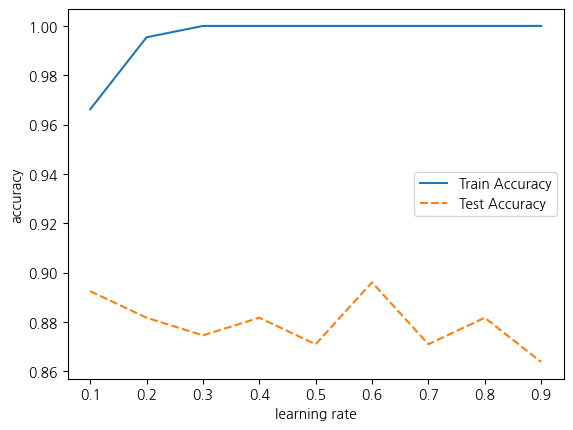

In [123]:
# LearningRate별 정확도 그래프 확인
plt.plot(para_lr, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_lr, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("learning rate")
plt.legend()

In [124]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# n_estimatos: 트리 수 변경
para_n_tree = [n_tree * 5 for n_tree in range(1, 10)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingClassifier(n_estimators = v_n_estimators, learning_rate=0.1, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n["Estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

In [125]:
para_n_tree

[5, 10, 15, 20, 25, 30, 35, 40, 45]

In [128]:
# n_estimators별 정확도 
df_accuracy_n.round(3)

,Estimators,TrainAccuracy,TestAccuracy
0,5,0.866,0.885
1,10,0.879,0.892
2,15,0.914,0.896
3,20,0.917,0.900
4,25,0.926,0.918
5,30,0.929,0.914
6,35,0.931,0.910
7,40,0.931,0.914
8,45,0.935,0.914


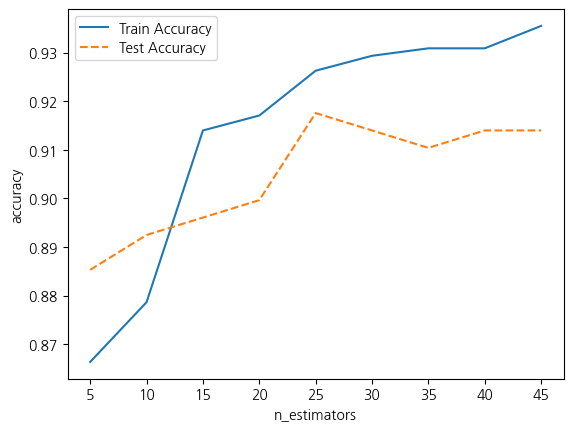

In [129]:
# 정확도를 그래프 확인
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("n_estimators")
plt.legend()

In [145]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# max_depth: 최대 깊이 변경. 1~10
para_depth = [depth for depth in range(1, 13)]

for v_max_depth in para_depth:
    gb = GradientBoostingClassifier(max_depth = v_max_depth,
                            n_estimators=25, learning_rate=0.6, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

In [146]:
para_depth

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [148]:
# max_depth별 정확도
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.914,0.910
1,2,0.957,0.860
2,3,0.992,0.892
3,4,1.000,0.867
4,5,1.000,0.875
5,6,1.000,0.885
6,7,1.000,0.882
7,8,1.000,0.892
8,9,1.000,0.892
9,10,1.000,0.889


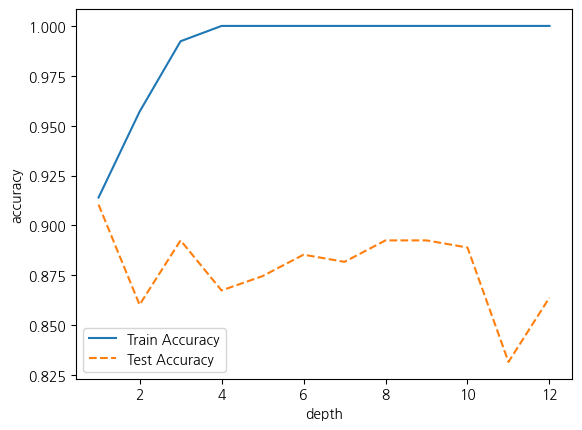

In [149]:
# 정확도를 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("depth")
plt.legend()

In [150]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_split: 분할하기 위한 노드의 최소 샘플 수. 20~100
para_split = [n_split * 10 for n_split in range(2, 11)]

for v_min_samples_split in para_split:
    gb = GradientBoostingClassifier(min_samples_split = v_min_samples_split,
                                    max_depth=8, n_estimators=25, learning_rate=0.6, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

In [151]:
para_split

[20, 30, 40, 50, 60, 70, 80, 90, 100]

In [152]:
# min_samples_leaf별 정확도 
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,20,1.0,0.882
1,30,1.0,0.871
2,40,1.0,0.889
3,50,1.0,0.882
4,60,1.0,0.885
5,70,1.0,0.885
6,80,1.0,0.892
7,90,1.0,0.882
8,100,1.0,0.864


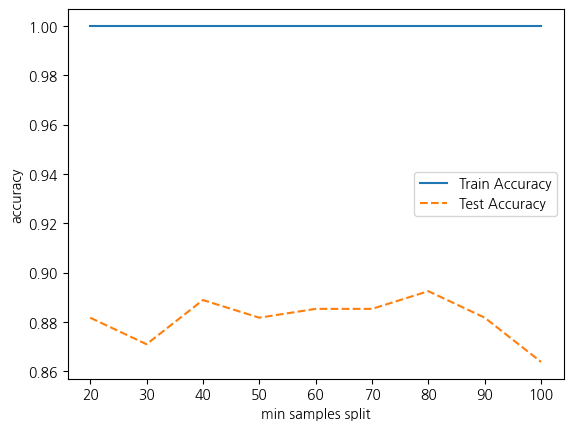

In [153]:
# 정확도를 그래프 확인
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("min samples split")
plt.legend()

In [154]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_leaf: 잎사귀 노드 최소 자료 수. 5~50
para_leaf = [n_leaf * 5 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingClassifier(min_samples_leaf = v_min_samples_leaf,
                                     max_depth=8, n_estimators=25, learning_rate=0.6, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

In [155]:
para_leaf

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

In [157]:
# min_samples_leaf별 정확도 
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,5,1.000,0.892
1,10,1.000,0.882
2,15,1.000,0.889
3,20,1.000,0.900
4,25,1.000,0.871
5,30,1.000,0.853
6,35,1.000,0.853
7,40,1.000,0.875
8,45,0.994,0.803
9,50,0.974,0.806


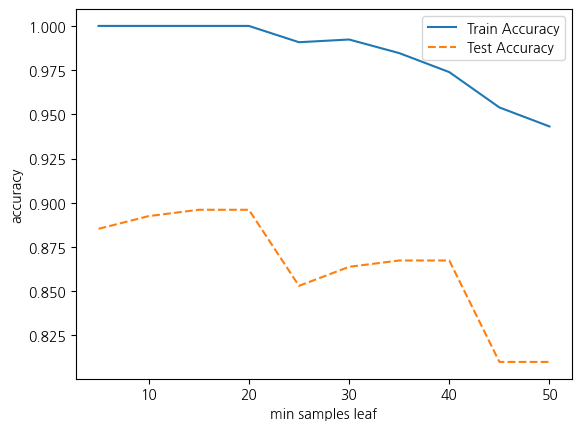

In [48]:
# 정확도를 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("min samples leaf")
plt.legend()

In [159]:
# 최종 모델
gb_final = GradientBoostingClassifier(min_samples_leaf=20, max_depth=8, n_estimators=25, learning_rate=0.6, 
                                      random_state=1234)
gb_final.fit(df_train_x, df_train_y)
# 예측
y_pred = gb_final.predict(df_test_x)

# train 모델 정확도
print("Train Accuracy: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
# test 모델 정확도
print("Test Accuracy: {:.3f}\n".format(gb_final.score(df_test_x, df_test_y)))
# confusion matrix
print("Test Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Train Accuracy: 1.000
Test Accuracy: 0.900

Test Confusion matrix: 
[[224  11]
 [ 17  27]]
              precision    recall  f1-score   support

           0      0.929     0.953     0.941       235
           1      0.711     0.614     0.659        44

    accuracy                          0.900       279
   macro avg      0.820     0.783     0.800       279
weighted avg      0.895     0.900     0.897       279



In [160]:
# 변수명
v_feature_name = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance ["Feature"] = v_feature_name
df_importance ["Importance"] = gb_final.feature_importances_
# df_feature_importance의 테이블을 중요도별로 정렬
df_importance .sort_values("Importance", ascending=False, inplace = True)
df_importance .round(3)

,Feature,Importance
14,HANDSET_ASAD90,0.221
3,DROPPED_CALLS,0.155
5,PEAK_CALLS_TIME,0.115
17,HANDSET_CAS30,0.110
2,SERVICE_DURATION,0.099
9,TOTAL_CALLS_TIME,0.073
1,AGE,0.037
7,WEEKEND_CALLS_TIME,0.034
8,TOTAL_CALLS_NO,0.034
4,PEAK_CALLS_NO,0.030


Text(0, 0.5, '설명변수')

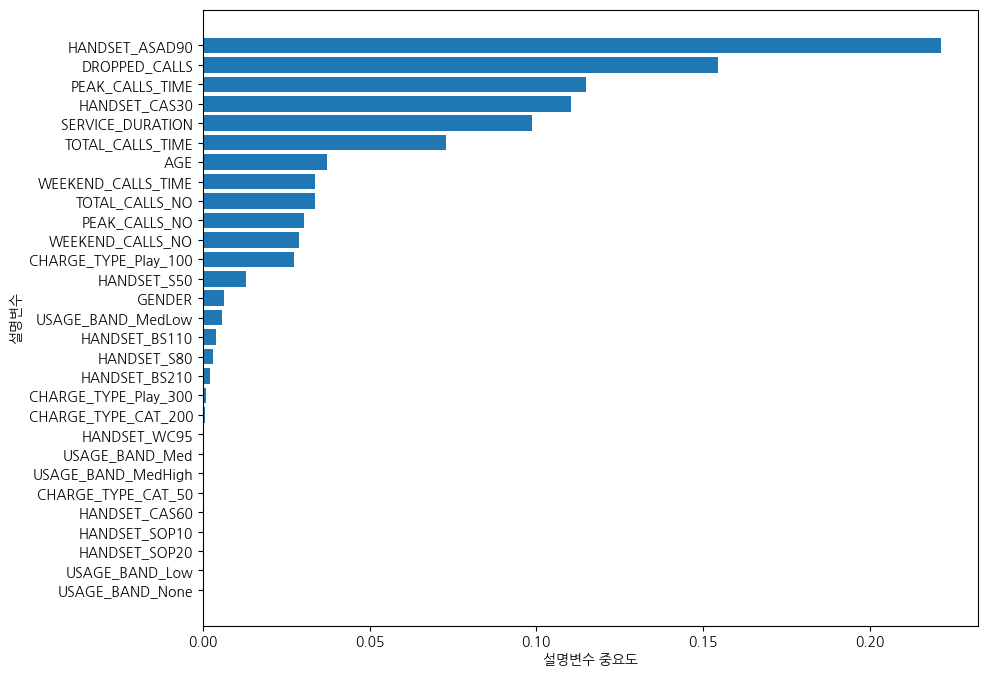

In [161]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림 
fig, ax = plt.subplots(figsize=(10, 8))

df_importance .sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance ))
plt.barh(y = coordinates, width = df_importance ["Importance"])
plt.yticks(coordinates, df_importance ["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

## XGBoost

In [162]:
!pip install xgboost

In [163]:
# xgboost 패키지 불러오기 
from xgboost import XGBClassifier

# 변수 중요도 확인: F1 점수 기준
from xgboost import plot_importance

# 분류모델 통합 평가: 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 등
def eval_class_model(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion, '\n')
    print('정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1    : {:.4f}'.format(F1))
    print('AUC   : {:.4f}'.format(AUC))

In [164]:
# 기본 모델 지정 및 기본 옵션 확인
xgboost_uncust = XGBClassifier(random_state=1234)

xgboost_uncust
# xgboost_uncust.get_params()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1234,
              reg_alpha=None, reg_lambda=None, ...)

In [165]:
# 모델 적합
xgboost_uncust.fit(df_train_x, df_train_y)

print('\n 모델 생성 및 평가 : Train \n')
# 예측 및 모델 평가:train  
xgb_pred_train = xgboost_uncust.predict(df_train_x)
# 모델 평가
eval_class_model(df_train_y, xgb_pred_train)

print('\n 모델 생성 및 평가 : Test \n')
# 예측 및 모델 평가:test 
xgb_pred_test = xgboost_uncust.predict(df_test_x)
# 모델 평가
eval_class_model(df_test_y, xgb_pred_test)


 모델 생성 및 평가 : Train 

오차행렬:
 [[515   0]
 [  0 136]] 

정확도: 1.0000
정밀도: 1.0000
재현율: 1.0000
F1    : 1.0000
AUC   : 1.0000

 모델 생성 및 평가 : Test 

오차행렬:
 [[221  14]
 [ 15  29]] 

정확도: 0.8961
정밀도: 0.6744
재현율: 0.6591
F1    : 0.6667
AUC   : 0.7998


In [166]:
# 사용자 모델 생성
xgboost_user= XGBClassifier(n_estimators = 25, learning_rate = 0.6, max_depth = 8, random_state=1234)
# 모델 적합
xgboost_user.fit(df_train_x, df_train_y)

# 예측 및 모델 평가:Train  
xgb_pred_train = xgboost_user.predict(df_train_x)

print('\n 사용자 모델 평가 : Train \n')
eval_class_model(df_train_y, xgb_pred_train)
print('\n',classification_report(df_train_y, xgb_pred_train))


# 예측 및 모델 평가:Test  
xgb_pred_test = xgboost_user.predict(df_test_x)

print('\n 사용자 모델 평가 : Test \n')
eval_class_model(df_test_y, xgb_pred_test)
print('\n',classification_report(df_test_y, xgb_pred_test))


 사용자 모델 평가 : Train 

오차행렬:
 [[515   0]
 [  0 136]] 

정확도: 1.0000
정밀도: 1.0000
재현율: 1.0000
F1    : 1.0000
AUC   : 1.0000

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       515
           1       1.00      1.00      1.00       136

    accuracy                           1.00       651
   macro avg       1.00      1.00      1.00       651
weighted avg       1.00      1.00      1.00       651


 사용자 모델 평가 : Test 

오차행렬:
 [[222  13]
 [ 17  27]] 

정확도: 0.8925
정밀도: 0.6750
재현율: 0.6136
F1    : 0.6429
AUC   : 0.7792

               precision    recall  f1-score   support

           0       0.93      0.94      0.94       235
           1       0.68      0.61      0.64        44

    accuracy                           0.89       279
   macro avg       0.80      0.78      0.79       279
weighted avg       0.89      0.89      0.89       279



In [167]:
# sklearn XGBoost 모델의 조기 중단:fit( )에 파라미터 입력(early_stopping_rounds, eval_metrics, eval_set.)
# 모델 파라미터 지정:n_estimators, learning_rate, max_depth 등 지정
# 조기 중간 파라미터 지정: early_stopping_rounds 
# 평가지표 지정:logloss

# 모델 성능 평가 데이터
eval_df = [(df_test_x, df_test_y)]

xgb_stop = XGBClassifier(n_estimators = 25, learning_rate = 0.6 , max_depth = 8, random_state=1234)
xgb_stop.fit(df_train_x, df_train_y, 
            # 조기 중단 파라미터
             early_stopping_rounds = 150, eval_metric="logloss", eval_set = eval_df, verbose=True)

[0]	validation_0-logloss:0.42559
[1]	validation_0-logloss:0.32902
[2]	validation_0-logloss:0.31165
[3]	validation_0-logloss:0.29115
[4]	validation_0-logloss:0.29815
[5]	validation_0-logloss:0.30144
[6]	validation_0-logloss:0.30171
[7]	validation_0-logloss:0.30717
[8]	validation_0-logloss:0.31027
[9]	validation_0-logloss:0.31700
[10]	validation_0-logloss:0.32031
[11]	validation_0-logloss:0.31499
[12]	validation_0-logloss:0.31560
[13]	validation_0-logloss:0.31441
[14]	validation_0-logloss:0.31015
[15]	validation_0-logloss:0.30962
[16]	validation_0-logloss:0.30947
[17]	validation_0-logloss:0.31614
[18]	validation_0-logloss:0.32430
[19]	validation_0-logloss:0.32517
[20]	validation_0-logloss:0.32771
[21]	validation_0-logloss:0.32531
[22]	validation_0-logloss:0.32561
[23]	validation_0-logloss:0.33006
[24]	validation_0-logloss:0.33271


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.6, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=25, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1234,
              reg_alpha=0, reg_lambda=1, ...)

In [168]:
# 최적 모델 정보 확인
print("최적 횟수:",xgb_stop.best_iteration)  
print("최적 성능(0-LogLoss):",xgb_stop.best_score)

최적 횟수: 3
최적 성능(0-LogLoss): 0.29114677974667175


In [169]:
# 최적 모델 평가
xgb_pred_stop = xgb_stop.predict(df_test_x)

print('\n 조기 중단 모델 평가 : Test \n')
eval_class_model(df_test_y, xgb_pred_stop)
print('\n',classification_report(df_test_y, xgb_pred_stop))


 조기 중단 모델 평가 : Test 

오차행렬:
 [[223  12]
 [ 19  25]] 

정확도: 0.8889
정밀도: 0.6757
재현율: 0.5682
F1    : 0.6173
AUC   : 0.7586

               precision    recall  f1-score   support

           0       0.92      0.95      0.94       235
           1       0.68      0.57      0.62        44

    accuracy                           0.89       279
   macro avg       0.80      0.76      0.78       279
weighted avg       0.88      0.89      0.88       279



{'GENDER': 7.0, 'AGE': 50.0, 'SERVICE_DURATION': 51.0, 'DROPPED_CALLS': 30.0, 'PEAK_CALLS_NO': 37.0, 'PEAK_CALLS_TIME': 41.0, 'WEEKEND_CALLS_NO': 42.0, 'WEEKEND_CALLS_TIME': 35.0, 'TOTAL_CALLS_NO': 25.0, 'TOTAL_CALLS_TIME': 35.0, 'CHARGE_TYPE_CAT_200': 4.0, 'CHARGE_TYPE_CAT_50': 1.0, 'CHARGE_TYPE_Play_100': 3.0, 'CHARGE_TYPE_Play_300': 4.0, 'HANDSET_ASAD90': 16.0, 'HANDSET_BS110': 4.0, 'HANDSET_BS210': 1.0, 'HANDSET_CAS30': 12.0, 'HANDSET_S50': 7.0, 'HANDSET_S80': 5.0, 'HANDSET_WC95': 3.0, 'USAGE_BAND_MedHigh': 3.0, 'USAGE_BAND_MedLow': 4.0}


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

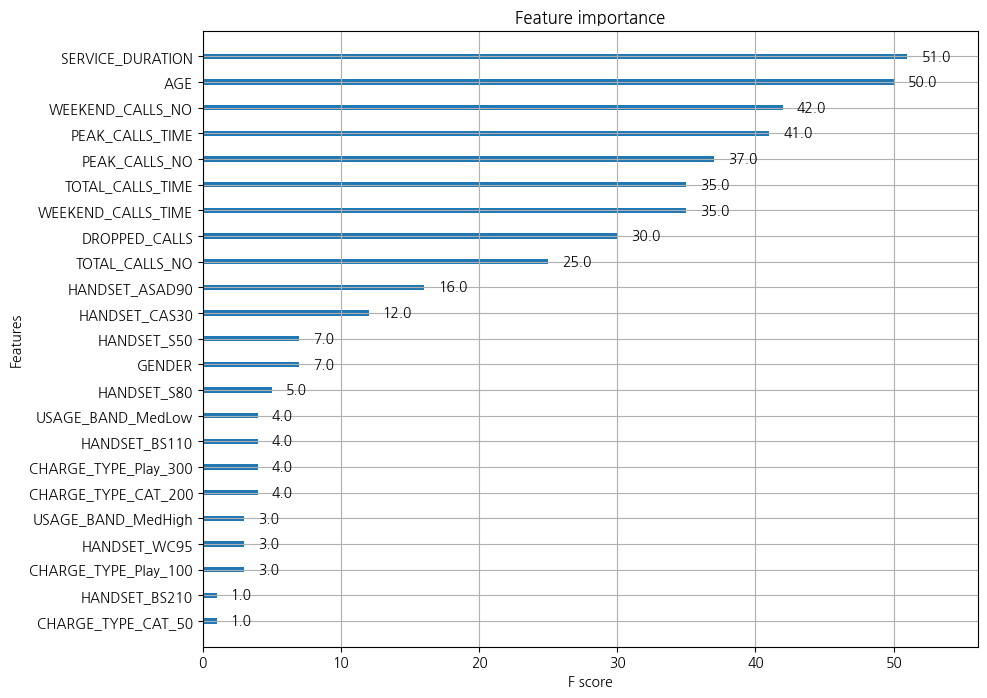

In [170]:
# 변수 중요도 확인 
from xgboost import plot_importance  # F1 score 기준으로 변수 중요도 표시(변경 가능)
print(xgb_stop.get_booster().get_fscore())

fig, ax = plt.subplots(figsize=(10, 8))
plot_importance(xgb_stop, ax=ax)

## LightGBM

In [171]:
# LightGBM 패키지 불러오기 
from lightgbm import LGBMClassifier

# 변수 중요도 확인: F1 점수 기준
from lightgbm import plot_importance

# 분류모델 통합 평가: 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 등
def eval_class_model(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion, '\n')
    print('정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1    : {:.4f}'.format(F1))
    print('AUC   : {:.4f}'.format(AUC))

In [172]:
# 기본 모델 지정 및 기본 옵션 확인
lgbm_uncust = LGBMClassifier(random_state=1234)

lgbm_uncust.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 1234,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [173]:
# 모델 적합
lgbm_uncust.fit(df_train_x, df_train_y)
print('\n 모델 생성 및 평가 : Train \n')
# 예측 및 모델 평가:train  
lgbm_pred_train = lgbm_uncust.predict(df_train_x)
eval_class_model(df_train_y, lgbm_pred_train)
print('\n 모델 생성 및 평가 : Test \n')
# 예측 및 모델 평가:test 
lgbm_pred_test = lgbm_uncust.predict(df_test_x)
eval_class_model(df_test_y, lgbm_pred_test)


 모델 생성 및 평가 : Train 

오차행렬:
 [[515   0]
 [  0 136]] 

정확도: 1.0000
정밀도: 1.0000
재현율: 1.0000
F1    : 1.0000
AUC   : 1.0000

 모델 생성 및 평가 : Test 

오차행렬:
 [[224  11]
 [ 17  27]] 

정확도: 0.8996
정밀도: 0.7105
재현율: 0.6136
F1    : 0.6585
AUC   : 0.7834


In [174]:
# 사용자 모델 생성
lgbm_user= LGBMClassifier(n_estimators = 25, learning_rate = 0.6, max_depth = 8, random_state=1234)
# 모델 적합
lgbm_user.fit(df_train_x, df_train_y)

# 예측 및 모델 평가:Train  
lgbm_pred_train = lgbm_user.predict(df_train_x)

print('\n 사용자 모델 평가 : Train \n')
eval_class_model(df_train_y, lgbm_pred_train)
print('\n',classification_report(df_train_y, lgbm_pred_train))

# 예측 및 모델 평가:Test  
lgbm_pred_test = lgbm_user.predict(df_test_x)

print('\n 사용자 모델 평가 : Test \n')
eval_class_model(df_test_y, lgbm_pred_test)
print('\n',classification_report(df_test_y, lgbm_pred_test))


 사용자 모델 평가 : Train 

오차행렬:
 [[515   0]
 [  0 136]] 

정확도: 1.0000
정밀도: 1.0000
재현율: 1.0000
F1    : 1.0000
AUC   : 1.0000

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       515
           1       1.00      1.00      1.00       136

    accuracy                           1.00       651
   macro avg       1.00      1.00      1.00       651
weighted avg       1.00      1.00      1.00       651


 사용자 모델 평가 : Test 

오차행렬:
 [[221  14]
 [ 18  26]] 

정확도: 0.8853
정밀도: 0.6500
재현율: 0.5909
F1    : 0.6190
AUC   : 0.7657

               precision    recall  f1-score   support

           0       0.92      0.94      0.93       235
           1       0.65      0.59      0.62        44

    accuracy                           0.89       279
   macro avg       0.79      0.77      0.78       279
weighted avg       0.88      0.89      0.88       279



In [175]:
# sklearn lightgbm 모델의 조기 중단 : fit( )에 파라미터 입력(early_stopping_rounds, eval_metrics, eval_set.)
# 모델 파라미터 지정:n_estimators, learning_rate, max_depth 등 지정
# 조기 중간 파라미터 지정: early_stopping_rounds 
# 평가지표 지정:logloss
eval_df = [(df_test_x, df_test_y)]

lgbm_stop = LGBMClassifier(n_estimators = 25, learning_rate = 0.6, max_depth = 8, random_state=1234)
# lgbm_stop = LGBMClassifier(n_estimators = 300, learning_rate = 0.1, max_depth = 6,
#                           reg_alpha=0.2)

# 모델 성능 평가 데이터
lgbm_stop.fit(df_train_x, df_train_y, 
              # 조기 중단 파라미터
              early_stopping_rounds = 200, eval_metric="logloss", eval_set = eval_df, verbose=True)


[1]	valid_0's binary_logloss: 0.318103
[2]	valid_0's binary_logloss: 0.269044
[3]	valid_0's binary_logloss: 0.290968
[4]	valid_0's binary_logloss: 0.305149
[5]	valid_0's binary_logloss: 0.296482
[6]	valid_0's binary_logloss: 0.307122
[7]	valid_0's binary_logloss: 0.318074
[8]	valid_0's binary_logloss: 0.33357
[9]	valid_0's binary_logloss: 0.335562
[10]	valid_0's binary_logloss: 0.333083
[11]	valid_0's binary_logloss: 0.351773
[12]	valid_0's binary_logloss: 0.371608
[13]	valid_0's binary_logloss: 0.377283
[14]	valid_0's binary_logloss: 0.378042
[15]	valid_0's binary_logloss: 0.385839
[16]	valid_0's binary_logloss: 0.397371
[17]	valid_0's binary_logloss: 0.412813
[18]	valid_0's binary_logloss: 0.403512
[19]	valid_0's binary_logloss: 0.426901
[20]	valid_0's binary_logloss: 0.43419
[21]	valid_0's binary_logloss: 0.450587
[22]	valid_0's binary_logloss: 0.44524
[23]	valid_0's binary_logloss: 0.454396
[24]	valid_0's binary_logloss: 0.458543
[25]	valid_0's binary_logloss: 0.472344


LGBMClassifier(learning_rate=0.6, max_depth=8, n_estimators=25,
               random_state=1234)

In [176]:
# 최적모델 정보 확인
print("최적 횟수:",lgbm_stop.best_iteration_)  
print("최적 성능(0-LogLoss):",lgbm_stop.best_score_) 

최적 횟수: 2
최적 성능(0-LogLoss): defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('binary_logloss', 0.2690443960334788)])})


In [177]:
# 참조!!! 모델 결과 확인
print(lgbm_stop.boosting_type)  # gbdt
print(lgbm_stop.class_weight)  # None
print(lgbm_stop.classes_)  # [0 1]
print(lgbm_stop.colsample_bytree)  # 1.0
# print(lgbm_stop.evals_result_)  # {'valid_0': OrderedDict([('binary_logloss', [0.28510

# print(lgbm_stop.evals_result_)  # 
print(lgbm_stop.feature_name_)  # 
print(lgbm_stop.feature_importances_)  # 

print(lgbm_stop.fit)  # <bound method LGBMClassifier.fit of LGBMClassifier(max_depth=6, n_estimators=300)>
print(lgbm_stop.fitted_)  # True
print(lgbm_stop.importance_type)  # split


print(lgbm_stop.learning_rate)  # 0.1
print(lgbm_stop.min_child_samples)  # 20 
print(lgbm_stop.n_classes_)  # 2
print(lgbm_stop.num_leaves)  # 31
print(lgbm_stop.objective)  # None
print(lgbm_stop.objective_)  # binary
print(lgbm_stop.predict)  # 
print(lgbm_stop.predict_proba)  # 
print(lgbm_stop.reg_alpha)  # 0.0
print(lgbm_stop.reg_lambda)  # 0.0
print(lgbm_stop.subsample_for_bin)  # 200000

gbdt
None
[0 1]
1.0
['GENDER', 'AGE', 'SERVICE_DURATION', 'DROPPED_CALLS', 'PEAK_CALLS_NO', 'PEAK_CALLS_TIME', 'WEEKEND_CALLS_NO', 'WEEKEND_CALLS_TIME', 'TOTAL_CALLS_NO', 'TOTAL_CALLS_TIME', 'CHARGE_TYPE_CAT_200', 'CHARGE_TYPE_CAT_50', 'CHARGE_TYPE_Play_100', 'CHARGE_TYPE_Play_300', 'HANDSET_ASAD90', 'HANDSET_BS110', 'HANDSET_BS210', 'HANDSET_CAS30', 'HANDSET_CAS60', 'HANDSET_S50', 'HANDSET_S80', 'HANDSET_SOP10', 'HANDSET_SOP20', 'HANDSET_WC95', 'USAGE_BAND_Low', 'USAGE_BAND_Med', 'USAGE_BAND_MedHigh', 'USAGE_BAND_MedLow', 'USAGE_BAND_None']
[0 6 2 3 1 1 1 0 1 6 0 0 1 0 2 0 0 2 0 1 1 0 0 1 0 0 0 0 0]
<bound method LGBMClassifier.fit of LGBMClassifier(learning_rate=0.6, max_depth=8, n_estimators=25,
               random_state=1234)>
True
split
0.6
20
2
31
None
binary
<bound method LGBMClassifier.predict of LGBMClassifier(learning_rate=0.6, max_depth=8, n_estimators=25,
               random_state=1234)>
<bound method LGBMClassifier.predict_proba of LGBMClassifier(learning_rate=0.6, max

In [178]:
# 최적 모델 평가
lgbm_pred_stop = lgbm_stop.predict(df_test_x)

print('\n 조기 중단 모델 평가 : Test \n')
eval_class_model(df_test_y, lgbm_pred_stop)
print('\n',classification_report(df_test_y, lgbm_pred_stop))


 조기 중단 모델 평가 : Test 

오차행렬:
 [[222  13]
 [ 14  30]] 

정확도: 0.9032
정밀도: 0.6977
재현율: 0.6818
F1    : 0.6897
AUC   : 0.8132

               precision    recall  f1-score   support

           0       0.94      0.94      0.94       235
           1       0.70      0.68      0.69        44

    accuracy                           0.90       279
   macro avg       0.82      0.81      0.82       279
weighted avg       0.90      0.90      0.90       279



['GENDER', 'AGE', 'SERVICE_DURATION', 'DROPPED_CALLS', 'PEAK_CALLS_NO', 'PEAK_CALLS_TIME', 'WEEKEND_CALLS_NO', 'WEEKEND_CALLS_TIME', 'TOTAL_CALLS_NO', 'TOTAL_CALLS_TIME', 'CHARGE_TYPE_CAT_200', 'CHARGE_TYPE_CAT_50', 'CHARGE_TYPE_Play_100', 'CHARGE_TYPE_Play_300', 'HANDSET_ASAD90', 'HANDSET_BS110', 'HANDSET_BS210', 'HANDSET_CAS30', 'HANDSET_CAS60', 'HANDSET_S50', 'HANDSET_S80', 'HANDSET_SOP10', 'HANDSET_SOP20', 'HANDSET_WC95', 'USAGE_BAND_Low', 'USAGE_BAND_Med', 'USAGE_BAND_MedHigh', 'USAGE_BAND_MedLow', 'USAGE_BAND_None']
[0 6 2 3 1 1 1 0 1 6 0 0 1 0 2 0 0 2 0 1 1 0 0 1 0 0 0 0 0]


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

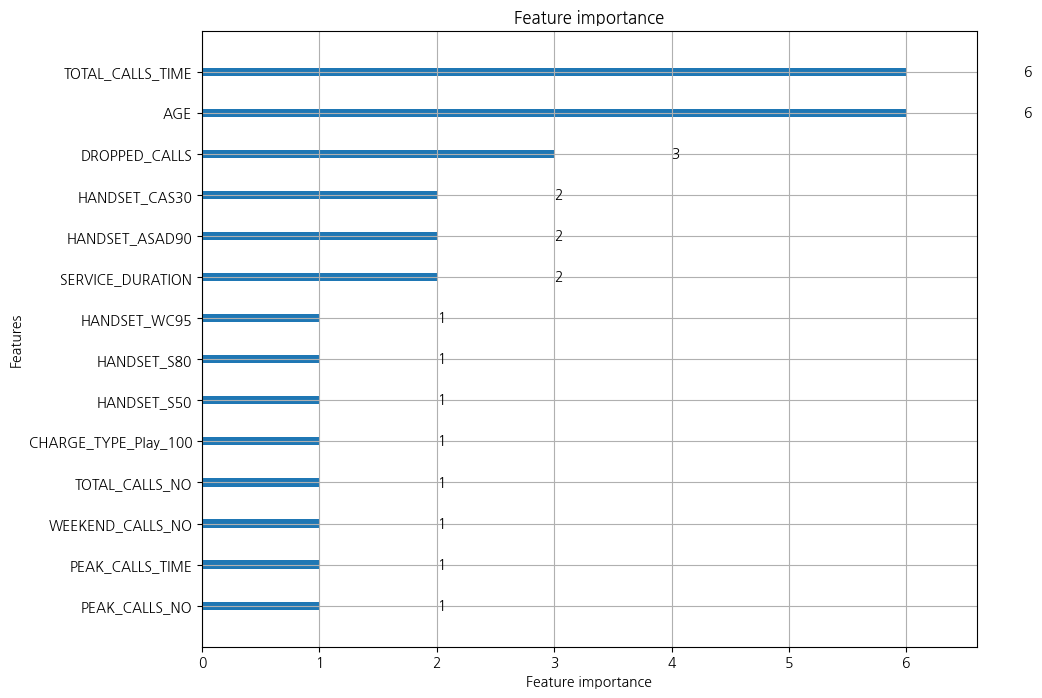

In [179]:
# 변수 중요도 확인 
from lightgbm import plot_importance
print(lgbm_stop.feature_name_)
print(lgbm_stop.feature_importances_)

fig, ax = plt.subplots(figsize=(10, 8))
plot_importance(lgbm_stop, ax=ax)

In [180]:
# package 설치
!pip install catboost

In [181]:
# 패키지 불러오기 
from catboost import CatBoostClassifier

# 변수 중요도 확인: CatBoost는 plot_importance 함수 미지원

# 분류모델 통합 평가: 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 등
def eval_class_model(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion, '\n')
    print('정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1    : {:.4f}'.format(F1))
    print('AUC   : {:.4f}'.format(AUC))

In [182]:
# 기본 모델 지정 및 기본 옵션 확인
cbc_uncust = CatBoostClassifier(random_state=1234)

cbc_uncust.get_all_params

<bound method CatBoost.get_all_params of <catboost.core.CatBoostClassifier object at 0x7f4d83cebc10>>

In [183]:
# 모델 적합
cbc_uncust.fit(df_train_x, df_train_y)

print('\n 모델 생성 및 평가 : Train \n')
# 예측 및 모델 평가:train  
cbc_pred_train = cbc_uncust.predict(df_train_x)
eval_class_model(df_train_y, cbc_pred_train)

print('\n 모델 생성 및 평가 : Test \n')
# 예측 및 모델 평가:test 
cbc_pred_test = cbc_uncust.predict(df_test_x)
eval_class_model(df_test_y, cbc_pred_test)

Learning rate set to 0.008577
0:	learn: 0.6880576	total: 4.26ms	remaining: 4.26s
1:	learn: 0.6816612	total: 7.28ms	remaining: 3.63s
2:	learn: 0.6763574	total: 10ms	remaining: 3.33s
3:	learn: 0.6698642	total: 12.2ms	remaining: 3.04s
4:	learn: 0.6632636	total: 14.5ms	remaining: 2.88s
5:	learn: 0.6575857	total: 16.6ms	remaining: 2.75s
6:	learn: 0.6507325	total: 19.1ms	remaining: 2.71s
7:	learn: 0.6444513	total: 21ms	remaining: 2.61s
8:	learn: 0.6399293	total: 22.8ms	remaining: 2.51s
9:	learn: 0.6353704	total: 24.5ms	remaining: 2.43s
10:	learn: 0.6306259	total: 26.3ms	remaining: 2.36s
11:	learn: 0.6257699	total: 27.9ms	remaining: 2.3s
12:	learn: 0.6203297	total: 29.5ms	remaining: 2.24s
13:	learn: 0.6143911	total: 31.2ms	remaining: 2.2s
14:	learn: 0.6081400	total: 32.8ms	remaining: 2.15s
15:	learn: 0.6041156	total: 34.3ms	remaining: 2.11s
16:	learn: 0.5995839	total: 36ms	remaining: 2.08s
17:	learn: 0.5960278	total: 37.6ms	remaining: 2.05s
18:	learn: 0.5912364	total: 39.1ms	remaining: 2.02s


In [184]:
# 사용자 모델 생성
cbc_user= CatBoostClassifier(n_estimators = 25, learning_rate = 0.6, max_depth = 8, random_state=1234)
# 모델 적합
cbc_user.fit(df_train_x, df_train_y)

# 예측 및 모델 평가:Train  
cbc_pred_train = cbc_user.predict(df_train_x)

print('\n 사용자 모델 평가 : Train \n')
eval_class_model(df_train_y, cbc_pred_train)
print('\n',classification_report(df_train_y, cbc_pred_train))


# 예측 및 모델 평가:Test  
cbc_pred_test = cbc_user.predict(df_test_x)

print('\n 사용자 모델 평가 : Test \n')
eval_class_model(df_test_y, cbc_pred_test)
print('\n',classification_report(df_test_y, cbc_pred_test))

0:	learn: 0.4129817	total: 7.81ms	remaining: 187ms
1:	learn: 0.3270333	total: 13.8ms	remaining: 158ms
2:	learn: 0.2725620	total: 19.6ms	remaining: 143ms
3:	learn: 0.2273890	total: 24.2ms	remaining: 127ms
4:	learn: 0.1863290	total: 28.4ms	remaining: 114ms
5:	learn: 0.1630914	total: 31.8ms	remaining: 101ms
6:	learn: 0.1423878	total: 34.9ms	remaining: 89.6ms
7:	learn: 0.1213850	total: 38.6ms	remaining: 82.1ms
8:	learn: 0.1108391	total: 41.4ms	remaining: 73.7ms
9:	learn: 0.0954167	total: 44.5ms	remaining: 66.8ms
10:	learn: 0.0825421	total: 47.6ms	remaining: 60.6ms
11:	learn: 0.0733951	total: 50.5ms	remaining: 54.7ms
12:	learn: 0.0628950	total: 53.7ms	remaining: 49.6ms
13:	learn: 0.0572601	total: 57.1ms	remaining: 44.9ms
14:	learn: 0.0507815	total: 60.3ms	remaining: 40.2ms
15:	learn: 0.0445775	total: 63.3ms	remaining: 35.6ms
16:	learn: 0.0411058	total: 66.4ms	remaining: 31.2ms
17:	learn: 0.0402666	total: 70.3ms	remaining: 27.3ms
18:	learn: 0.0361664	total: 73.7ms	remaining: 23.3ms
19:	learn

In [185]:
# CatBoost 모델의 조기 중단:fit( )에 파라미터 입력(early_stopping_rounds, eval_metrics, eval_set.)
# 모델 파라미터 지정:n_estimators, learning_rate, max_depth 등 지정
# 조기 중간 파라미터 지정: early_stopping_rounds 
# 평가지표 지정:logloss

# 모델 성능 평가 데이터
eval_df = [(df_test_x, df_test_y)]

cbc_stop = CatBoostClassifier(n_estimators = 25, learning_rate = 0.6 , max_depth = 8, random_state=1234)

cbc_stop.fit(df_train_x, df_train_y, 
            # 조기 중단 파라미터
             early_stopping_rounds = 150,eval_set = eval_df, verbose=True)
# cbc_stop.fit(df_train_x, df_train_y, 
#             # 조기 중단 파라미터
#              early_stopping_rounds = 150, eval_metric="auto", eval_set = eval_df, 
#              verbose=True)

0:	learn: 0.4129817	test: 0.4072454	best: 0.4072454 (0)	total: 9.34ms	remaining: 224ms
1:	learn: 0.3270333	test: 0.3126119	best: 0.3126119 (1)	total: 14.9ms	remaining: 171ms
2:	learn: 0.2725620	test: 0.2834220	best: 0.2834220 (2)	total: 19.2ms	remaining: 141ms
3:	learn: 0.2273890	test: 0.2847363	best: 0.2834220 (2)	total: 23.4ms	remaining: 123ms
4:	learn: 0.1863290	test: 0.2903901	best: 0.2834220 (2)	total: 27ms	remaining: 108ms
5:	learn: 0.1630914	test: 0.2922536	best: 0.2834220 (2)	total: 30.3ms	remaining: 95.9ms
6:	learn: 0.1423878	test: 0.2873428	best: 0.2834220 (2)	total: 33.6ms	remaining: 86.3ms
7:	learn: 0.1213850	test: 0.2973657	best: 0.2834220 (2)	total: 36.5ms	remaining: 77.6ms
8:	learn: 0.1108391	test: 0.3024113	best: 0.2834220 (2)	total: 39.6ms	remaining: 70.5ms
9:	learn: 0.0954167	test: 0.3010315	best: 0.2834220 (2)	total: 42.6ms	remaining: 63.9ms
10:	learn: 0.0825421	test: 0.2987597	best: 0.2834220 (2)	total: 46.5ms	remaining: 59.2ms
11:	learn: 0.0733951	test: 0.2941307	b

In [186]:
# 최적모델 정보 확인
print("최적 횟수:",cbc_stop.best_iteration_)  
print("최적 성능:",cbc_stop.best_score_)

최적 횟수: 2
최적 성능: {'learn': {'Logloss': 0.021512618406064887}, 'validation': {'Logloss': 0.2834219684137979}}


In [187]:
# 조기 중단 예측 및 모델 평가:Test  
cbc_pred_stop = cbc_stop.predict(df_test_x)

print('\n 조기 중단 모델 평가 : Test \n')
eval_class_model(df_test_y, cbc_pred_stop)
print('\n',classification_report(df_test_y, cbc_pred_stop))


 조기 중단 모델 평가 : Test 

오차행렬:
 [[226   9]
 [ 19  25]] 

정확도: 0.8996
정밀도: 0.7353
재현율: 0.5682
F1    : 0.6410
AUC   : 0.7649

               precision    recall  f1-score   support

           0       0.92      0.96      0.94       235
           1       0.74      0.57      0.64        44

    accuracy                           0.90       279
   macro avg       0.83      0.76      0.79       279
weighted avg       0.89      0.90      0.89       279



In [188]:
# 변수 중요도 확인 
print(cbc_stop.feature_names_)
print(cbc_stop.feature_importances_)
# print(cbc_stop.get_feature_importance())

['GENDER', 'AGE', 'SERVICE_DURATION', 'DROPPED_CALLS', 'PEAK_CALLS_NO', 'PEAK_CALLS_TIME', 'WEEKEND_CALLS_NO', 'WEEKEND_CALLS_TIME', 'TOTAL_CALLS_NO', 'TOTAL_CALLS_TIME', 'CHARGE_TYPE_CAT_200', 'CHARGE_TYPE_CAT_50', 'CHARGE_TYPE_Play_100', 'CHARGE_TYPE_Play_300', 'HANDSET_ASAD90', 'HANDSET_BS110', 'HANDSET_BS210', 'HANDSET_CAS30', 'HANDSET_CAS60', 'HANDSET_S50', 'HANDSET_S80', 'HANDSET_SOP10', 'HANDSET_SOP20', 'HANDSET_WC95', 'USAGE_BAND_Low', 'USAGE_BAND_Med', 'USAGE_BAND_MedHigh', 'USAGE_BAND_MedLow', 'USAGE_BAND_None']
[ 0.          0.96881473  6.31301331 18.04677008  0.          7.30125883
  1.88447285  2.77297223  2.56577744  0.          0.          0.
  2.42084143  0.         26.18376765  0.          0.         12.17303619
  0.          0.          0.          0.          3.12836527  8.40632371
  0.          7.75742209  0.          0.          0.0771642 ]


In [189]:
# 변수명
v_feature_name = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_cbc_importance = pd.DataFrame()
df_cbc_importance ["Feature"] = cbc_stop.feature_names_
df_cbc_importance ["Importance"] = cbc_stop.feature_importances_
# 중요도별로 정렬
df_cbc_importance .sort_values("Importance", ascending=False, inplace = True)
df_cbc_importance .round(3)

,Feature,Importance
14,HANDSET_ASAD90,26.184
3,DROPPED_CALLS,18.047
17,HANDSET_CAS30,12.173
23,HANDSET_WC95,8.406
25,USAGE_BAND_Med,7.757
5,PEAK_CALLS_TIME,7.301
2,SERVICE_DURATION,6.313
22,HANDSET_SOP20,3.128
7,WEEKEND_CALLS_TIME,2.773
8,TOTAL_CALLS_NO,2.566


Text(0, 0.5, '설명변수')

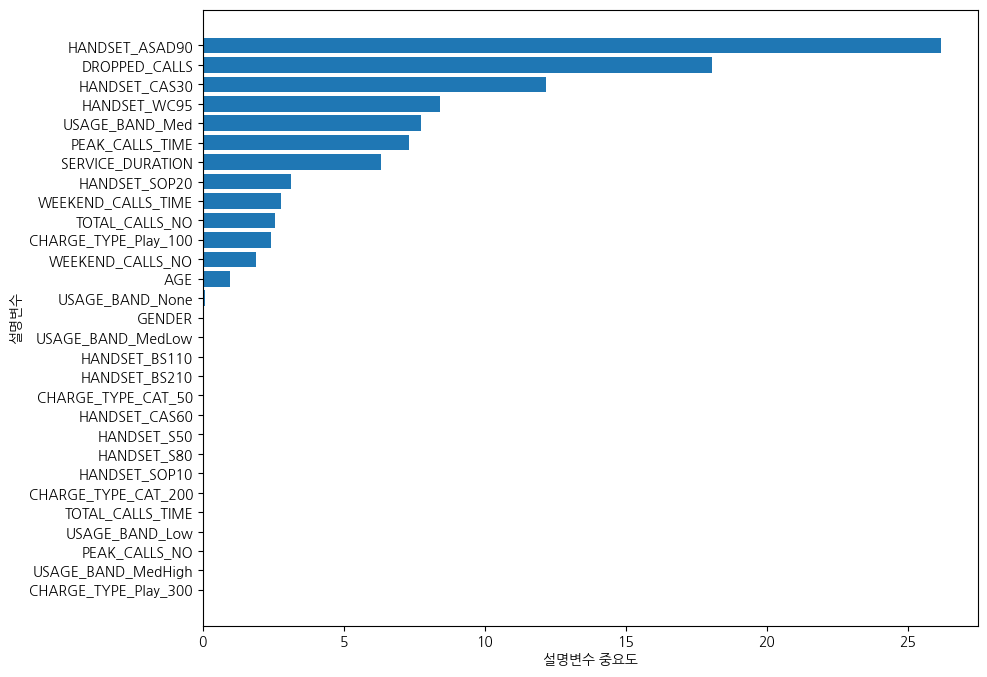

In [190]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림 
fig, ax = plt.subplots(figsize=(10, 8))

df_cbc_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_cbc_importance ))
plt.barh(y = coordinates, width = df_cbc_importance ["Importance"])
plt.yticks(coordinates, df_cbc_importance ["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

# 서포트 벡터 머신

In [239]:
# 데이터 구성:Series, DataFrame
import pandas as pd
import numpy as np
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# 데이터 scaling
from sklearn.preprocessing import StandardScaler
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 분류 SVM
from sklearn.svm import SVC
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

In [240]:
# 목표변수/설명변수 분리
df_raw_x = df_raw.drop("CHURN", axis = 1, inplace = False)
df_raw_y = df_raw["CHURN"] 

display("설명변수:", df_raw_x.head())
display("목표변수:",df_raw_y.head())

'설명변수:'

,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,1,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,1,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,1,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,0,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


'목표변수:'

0    0
1    0
2    0
3    0
4    0
Name: CHURN, dtype: int64

In [241]:
# 범주형 변수 선택 : select_dtypes="object" 
df_raw_x_char = df_raw_x.select_dtypes(include = "object")
df_raw_x_char.head()

# get_dummies: 범주형 변수에 대한 더미변환 
df_x_dummy = pd.get_dummies(df_raw_x_char)
df_x_dummy.head()

display("Dummy 변환 전:", df_raw_x_char.head())
display("Dummy 변환 후:",df_x_dummy.head())

'Dummy 변환 전:'

,CHARGE_TYPE,HANDSET,USAGE_BAND
0,CAT 100,ASAD170,Med
1,CAT 100,S50,Med
2,CAT 100,ASAD170,Med
3,CAT 100,ASAD170,Med
4,CAT 100,S50,Med


'Dummy 변환 후:'

,CHARGE_TYPE_CAT 100,CHARGE_TYPE_CAT 200,CHARGE_TYPE_CAT 50,CHARGE_TYPE_Play 100,CHARGE_TYPE_Play 300,HANDSET_ASAD170,HANDSET_ASAD90,HANDSET_BS110,HANDSET_BS210,HANDSET_CAS30,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [242]:
# 연속형 변수 선택 : select_dtypes="object" 제외
df_raw_x_num = df_raw_x.select_dtypes(exclude = "object")
# df_raw_x_num.head()

# 변수명 저장
v_feature_names = df_raw_x_num.columns

# StandardScaler 적용
scaler = StandardScaler()
df_x_scaled = scaler.fit_transform(df_raw_x_num)
df_x_scaled = pd.DataFrame(df_x_scaled, columns=v_feature_names)

display("Scale 변환 전:", df_raw_x_num.head())
display("Scale 변환 후:",df_x_scaled.head())

'Scale 변환 전:'

,GENDER,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,31,33.33,6,218,379.8,9,21.6,366,632.4
1,1,27,30.87,10,373,656.4,11,28.0,411,810.4
2,1,27,49.40,11,260,582.0,0,0.0,265,614.1
3,1,61,48.60,1,294,661.8,14,101.5,326,844.0
4,0,52,56.03,0,221,555.6,7,25.0,274,673.0


'Scale 변환 후:'

,GENDER,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,-0.943527,-0.030604,-0.069958,0.949112,-0.032834,-0.617357,-0.432263,-0.755024,0.079015,-0.783880
1,1.059853,-0.335827,-0.243451,2.091732,0.651830,-0.080674,-0.307456,-0.579614,0.259163,-0.458260
2,1.059853,-0.335827,1.063386,2.377387,0.152687,-0.225031,-0.993897,-1.347031,-0.325316,-0.817357
3,1.059853,2.258568,1.006966,-0.479163,0.302872,-0.070196,-0.120245,1.434855,-0.081116,-0.396795
4,-0.943527,1.571816,1.530970,-0.764818,-0.019583,-0.276254,-0.557071,-0.661838,-0.289287,-0.709610


In [243]:
# 설명변수 데이터 결합: scale된 연속형 + dummy된 범주형
df_x_converted = df_x_scaled.join(df_x_dummy)

display("변환 전:", df_raw_x.head())
display("Scale/Dummy 변환 후:",df_x_converted.head())

'변환 전:'

,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,1,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,1,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,1,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,0,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


'Scale/Dummy 변환 후:'

,GENDER,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,-0.943527,-0.030604,-0.069958,0.949112,-0.032834,-0.617357,-0.432263,-0.755024,0.079015,-0.783880,...,0,0,0,0,0,0,1,0,0,0
1,1.059853,-0.335827,-0.243451,2.091732,0.651830,-0.080674,-0.307456,-0.579614,0.259163,-0.458260,...,0,0,0,0,0,0,1,0,0,0
2,1.059853,-0.335827,1.063386,2.377387,0.152687,-0.225031,-0.993897,-1.347031,-0.325316,-0.817357,...,0,0,0,0,0,0,1,0,0,0
3,1.059853,2.258568,1.006966,-0.479163,0.302872,-0.070196,-0.120245,1.434855,-0.081116,-0.396795,...,0,0,0,0,0,0,1,0,0,0
4,-0.943527,1.571816,1.530970,-0.764818,-0.019583,-0.276254,-0.557071,-0.661838,-0.289287,-0.709610,...,0,0,0,0,0,0,1,0,0,0


In [244]:
# 변환된 설명변수 데이터 사용:df_x_converted 
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_converted, df_raw_y
                                    , test_size = 0.3, random_state = 1234)

print("분할된 Train Data: {}".format(df_train_x.shape))
print("분할된 Test Data: {}".format(df_test_x.shape))

분할된 Train Data: (651, 32)
분할된 Test Data: (279, 32)


In [247]:
svm_uncust = SVC(random_state=1234)
svm_uncust.fit(df_train_x, df_train_y)

# train 모델 정확도
print("Train Accuracy : {:.3f}".format(svm_uncust.score(df_train_x, df_train_y)))
# test 모델 정확도
print("Test Accuracy : {:.3f}".format(svm_uncust.score(df_test_x, df_test_y)))

Train Accuracy : 0.909
Test Accuracy : 0.882


In [248]:
# 실행옵션 확인
print(svm_uncust.get_params().keys())
print(svm_uncust.get_params().values())

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])
dict_values([1.0, False, 200, None, 0.0, 'ovr', 3, 'scale', 'rbf', -1, False, 1234, True, 0.001, False])


In [250]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_c = [10 **c for c in range(-2, 3)] # 0.01, 0.1, 1, 10, 100 : 큰 변화 영향 확인
# para_c = [0.1 * c for c in range(1, 13)] )] # 0.1~1.0 : 작은 변화 영향 확인

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["Cost"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

In [251]:
# Cost별 정확도
df_accuracy_c.round(3)

,Cost,TrainAccuracy,TestAccuracy
0,0.01,0.791,0.842
1,0.10,0.791,0.842
2,1.00,0.909,0.882
3,10.00,0.986,0.889
4,100.00,1.000,0.878


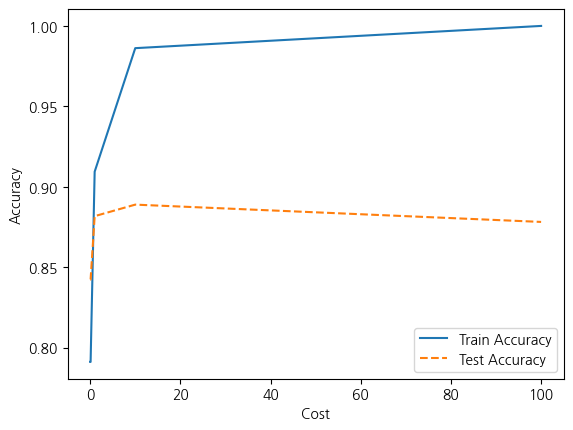

In [252]:
# 정확도 그래프 확인
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Cost")
plt.legend()

In [260]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# para_c = [10 **c for c in range(-2, 3)] # 0.01, 0.1, 1, 10, 100 : 큰 변화 영향 확인
para_c = [1 * c for c in range(1, 15)] # 0.1~1.0 : 작은 변화 영향 확인

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["Cost"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

In [262]:
# Cost별 정확도
df_accuracy_c.round(3)

,Cost,TrainAccuracy,TestAccuracy
0,1,0.909,0.882
1,2,0.935,0.921
2,3,0.948,0.910
3,4,0.959,0.910
4,5,0.962,0.900
5,6,0.968,0.900
6,7,0.977,0.892
7,8,0.983,0.889
8,9,0.983,0.892
9,10,0.986,0.889


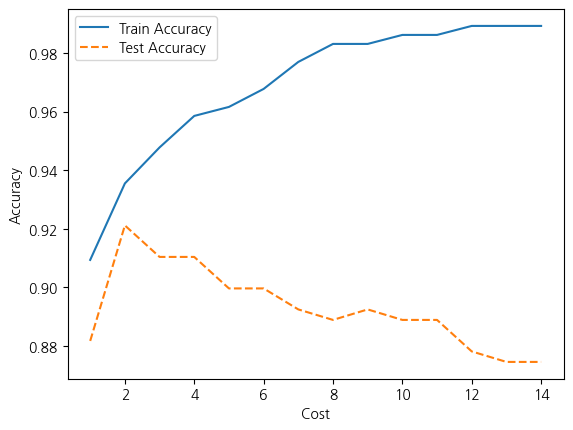

In [263]:
# 정확도 그래프 확인
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Cost")
plt.legend()

In [267]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_gamma = [0.01 **gamma for gamma in range(-2, 3)]   # 0.01, 0.1, 1, 10, 100 : 큰 변화 영향 확인
# para_gamma = [0.1 * gamma for gamma in range(1, 11)]     # 0.1~1.0 : 작은 변화 영향 확인

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = 10, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

In [268]:
# Gamma별 정확도
df_accuracy_gamma.round(4)

,gamma,TrainAccuracy,TestAccuracy
0,10000.0000,1.0000,0.8423
1,100.0000,1.0000,0.8423
2,1.0000,1.0000,0.8423
3,0.0100,0.8971,0.9068
4,0.0001,0.7911,0.8423


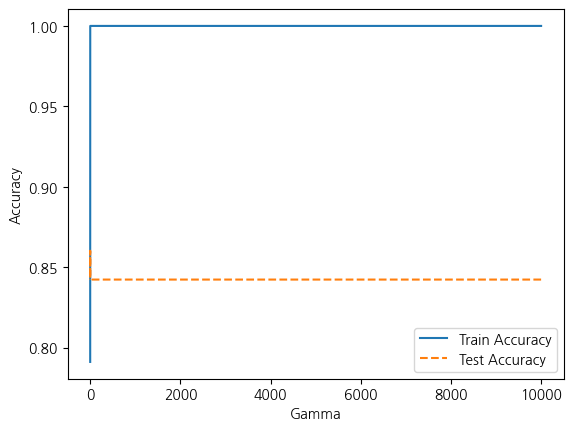

In [266]:
# 모델 정확도 그래프 확인
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Gamma")  # X 축 범위 log 변환
plt.legend()

In [269]:
# Gamma 미세 변화에 따른 모델 성능
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# para_gamma = [10 **gamma for gamma in range(-2, 3)]   # 0.01, 0.1, 1, 10, 100 : 큰 변화 영향 확인
para_gamma = [0.01 * gamma for gamma in range(1, 11)]     # 0.1~1.0 : 작은 변화 영향 확인

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = 10, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

In [270]:
# Gamma별 정확도
df_accuracy_gamma.round(4)

,gamma,TrainAccuracy,TestAccuracy
0,0.01,0.8971,0.9068
1,0.02,0.9201,0.9176
2,0.03,0.9370,0.9176
3,0.04,0.9493,0.9068
4,0.05,0.9555,0.8961
5,0.06,0.9662,0.8889
6,0.07,0.9831,0.8889
7,0.08,0.9862,0.8889
8,0.09,0.9892,0.8781
9,0.10,0.9908,0.8781


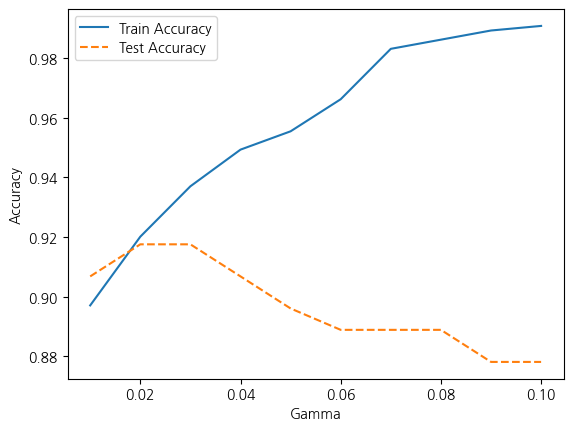

In [271]:
# 모델 정확도 그래프 확인
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Gamma")  # X 축 범위 log 변환
plt.legend()

In [273]:
# 최종 모델
svc_final = SVC(gamma=0.1, C=10, random_state=1234)
svc_final.fit(df_train_x, df_train_y)

# 평가
y_pred = svc_final.predict(df_test_x)

# train 모델 정확도
print("Train Accucary : {:.3f}".format(svc_final.score(df_train_x, df_train_y)))
# test 모델 정확도
print("Test Accuracy : {:.3f}\n".format(svc_final.score(df_test_x, df_test_y)))
# confusion matrix
print("Test Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Train Accucary : 0.991
Test Accuracy : 0.878

Test Confusion matrix: 
[[220  15]
 [ 19  25]]
              precision    recall  f1-score   support

           0      0.921     0.936     0.928       235
           1      0.625     0.568     0.595        44

    accuracy                          0.878       279
   macro avg      0.773     0.752     0.762       279
weighted avg      0.874     0.878     0.876       279



# 인공신경망

In [370]:
# 데이터 구성:Series, DataFrame
import pandas as pd
import numpy as np
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# 데이터 scaling
from sklearn.preprocessing import StandardScaler
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 분류 NN (MLPClassifier)
from sklearn.neural_network import MLPClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

In [371]:
# 목표변수/설명변수 분리
df_raw_x = df_raw.drop("CHURN", axis = 1, inplace = False)
df_raw_y = df_raw["CHURN"] 

display("설명변수:", df_raw_x.head())
display("목표변수:",df_raw_y.head())

'설명변수:'

,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,1,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,1,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,1,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,0,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


'목표변수:'

0    0
1    0
2    0
3    0
4    0
Name: CHURN, dtype: int64

In [372]:
# 연속형 변수 선택 : select_dtypes="object" 제외
df_raw_x_num = df_raw_x.select_dtypes(exclude = "object")
# df_raw_x_num.head()

# 변수명 저장
v_feature_names = df_raw_x_num.columns

# StandardScaler 적용
scaler = StandardScaler()
df_x_scaled = scaler.fit_transform(df_raw_x_num)
df_x_scaled = pd.DataFrame(df_x_scaled, columns=v_feature_names)

display("Scale 변환 전:", df_raw_x_num.head())
display("Scale 변환 후:",df_x_scaled.head())

'Scale 변환 전:'

,GENDER,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,31,33.33,6,218,379.8,9,21.6,366,632.4
1,1,27,30.87,10,373,656.4,11,28.0,411,810.4
2,1,27,49.40,11,260,582.0,0,0.0,265,614.1
3,1,61,48.60,1,294,661.8,14,101.5,326,844.0
4,0,52,56.03,0,221,555.6,7,25.0,274,673.0


'Scale 변환 후:'

,GENDER,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,-0.943527,-0.030604,-0.069958,0.949112,-0.032834,-0.617357,-0.432263,-0.755024,0.079015,-0.783880
1,1.059853,-0.335827,-0.243451,2.091732,0.651830,-0.080674,-0.307456,-0.579614,0.259163,-0.458260
2,1.059853,-0.335827,1.063386,2.377387,0.152687,-0.225031,-0.993897,-1.347031,-0.325316,-0.817357
3,1.059853,2.258568,1.006966,-0.479163,0.302872,-0.070196,-0.120245,1.434855,-0.081116,-0.396795
4,-0.943527,1.571816,1.530970,-0.764818,-0.019583,-0.276254,-0.557071,-0.661838,-0.289287,-0.709610


In [373]:
# 범주형 변수 선택 : select_dtypes="object" 
df_raw_x_char = df_raw_x.select_dtypes(include = "object")
df_raw_x_char.head()

# get_dummies: 범주형 변수에 대한 더미변환 
df_x_dummy = pd.get_dummies(df_raw_x_char)
df_x_dummy.head()

display("Dummy 변환 전:", df_raw_x_char.head())
display("Dummy 변환 후:",df_x_dummy.head())

'Dummy 변환 전:'

,CHARGE_TYPE,HANDSET,USAGE_BAND
0,CAT 100,ASAD170,Med
1,CAT 100,S50,Med
2,CAT 100,ASAD170,Med
3,CAT 100,ASAD170,Med
4,CAT 100,S50,Med


'Dummy 변환 후:'

,CHARGE_TYPE_CAT 100,CHARGE_TYPE_CAT 200,CHARGE_TYPE_CAT 50,CHARGE_TYPE_Play 100,CHARGE_TYPE_Play 300,HANDSET_ASAD170,HANDSET_ASAD90,HANDSET_BS110,HANDSET_BS210,HANDSET_CAS30,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [383]:
# 연속형 변수 선택 : select_dtypes="object" 제외
df_raw_x_num = df_raw_x.select_dtypes(exclude = "object")
# df_raw_x_num.head()

# 변수명 저장
v_feature_names = df_raw_x_num.columns

# StandardScaler 적용
scaler = StandardScaler()
df_x_scaled = scaler.fit_transform(df_raw_x_num)
df_x_scaled = pd.DataFrame(df_x_scaled, columns=v_feature_names)

display("Scale 변환 전:", df_raw_x_num.head())
display("Scale 변환 후:",df_x_scaled.head())

'Scale 변환 전:'

,GENDER,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,31,33.33,6,218,379.8,9,21.6,366,632.4
1,1,27,30.87,10,373,656.4,11,28.0,411,810.4
2,1,27,49.40,11,260,582.0,0,0.0,265,614.1
3,1,61,48.60,1,294,661.8,14,101.5,326,844.0
4,0,52,56.03,0,221,555.6,7,25.0,274,673.0


'Scale 변환 후:'

,GENDER,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,-0.943527,-0.030604,-0.069958,0.949112,-0.032834,-0.617357,-0.432263,-0.755024,0.079015,-0.783880
1,1.059853,-0.335827,-0.243451,2.091732,0.651830,-0.080674,-0.307456,-0.579614,0.259163,-0.458260
2,1.059853,-0.335827,1.063386,2.377387,0.152687,-0.225031,-0.993897,-1.347031,-0.325316,-0.817357
3,1.059853,2.258568,1.006966,-0.479163,0.302872,-0.070196,-0.120245,1.434855,-0.081116,-0.396795
4,-0.943527,1.571816,1.530970,-0.764818,-0.019583,-0.276254,-0.557071,-0.661838,-0.289287,-0.709610


In [384]:
# 범주형 변수 선택 : select_dtypes="object" 
df_raw_x_char = df_raw_x.select_dtypes(include = "object")
df_raw_x_char.head()

# get_dummies: 범주형 변수에 대한 더미변환 
df_x_dummy = pd.get_dummies(df_raw_x_char)
df_x_dummy.head()

display("Dummy 변환 전:", df_raw_x_char.head())
display("Dummy 변환 후:",df_x_dummy.head())

'Dummy 변환 전:'

,CHARGE_TYPE,HANDSET,USAGE_BAND
0,CAT 100,ASAD170,Med
1,CAT 100,S50,Med
2,CAT 100,ASAD170,Med
3,CAT 100,ASAD170,Med
4,CAT 100,S50,Med


'Dummy 변환 후:'

,CHARGE_TYPE_CAT 100,CHARGE_TYPE_CAT 200,CHARGE_TYPE_CAT 50,CHARGE_TYPE_Play 100,CHARGE_TYPE_Play 300,HANDSET_ASAD170,HANDSET_ASAD90,HANDSET_BS110,HANDSET_BS210,HANDSET_CAS30,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [385]:
# 설명변수 데이터 결합: scale된 연속형 + dummy된 범주형
df_x_converted = df_x_scaled.join(df_x_dummy)

display("변환 전:", df_raw_x.head())
display("Scale/Dummy 변환 후:",df_x_converted.head())

'변환 전:'

,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,1,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,1,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,1,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,0,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


'Scale/Dummy 변환 후:'

,GENDER,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,-0.943527,-0.030604,-0.069958,0.949112,-0.032834,-0.617357,-0.432263,-0.755024,0.079015,-0.783880,...,0,0,0,0,0,0,1,0,0,0
1,1.059853,-0.335827,-0.243451,2.091732,0.651830,-0.080674,-0.307456,-0.579614,0.259163,-0.458260,...,0,0,0,0,0,0,1,0,0,0
2,1.059853,-0.335827,1.063386,2.377387,0.152687,-0.225031,-0.993897,-1.347031,-0.325316,-0.817357,...,0,0,0,0,0,0,1,0,0,0
3,1.059853,2.258568,1.006966,-0.479163,0.302872,-0.070196,-0.120245,1.434855,-0.081116,-0.396795,...,0,0,0,0,0,0,1,0,0,0
4,-0.943527,1.571816,1.530970,-0.764818,-0.019583,-0.276254,-0.557071,-0.661838,-0.289287,-0.709610,...,0,0,0,0,0,0,1,0,0,0


In [386]:
# 변환된 설명변수 데이터 사용:df_x_converted 
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_converted, df_raw_y
                                    , test_size = 0.3, random_state = 1234)

print("분할된 Train Data: {}".format(df_train_x.shape))
print("분할된 Test Data: {}".format(df_test_x.shape))

분할된 Train Data: (651, 32)
분할된 Test Data: (279, 32)


In [387]:
nn_uncust = MLPClassifier(random_state=1234)
nn_uncust.fit(df_train_x, df_train_y)

# train 모델 정확도
print("Train Accuracy: {:.3f}".format(nn_uncust.score(df_train_x, df_train_y)))
# test 모델 정확도
print("Test Accuracy: {:.3f}".format(nn_uncust.score(df_test_x, df_test_y)))

Train Accuracy: 0.960
Test Accuracy: 0.896


In [388]:
# 실행옵션 확인
print(nn_uncust.get_params().keys())
print(nn_uncust.get_params().values())

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])
dict_values(['relu', 0.0001, 'auto', 0.9, 0.999, False, 1e-08, (100,), 'constant', 0.001, 15000, 200, 0.9, 10, True, 0.5, 1234, True, 'adam', 0.0001, 0.1, False, False])


In [389]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
para_hidden = [5 * hidden for hidden in range(1, 21)]  # 은닉층 노드 

print(para_hidden)

for v_hidden in para_hidden:
#     nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state = 1234) # 은닉층 : 1D (5,), (10,)...
    nn = MLPClassifier(hidden_layer_sizes = (v_hidden,v_hidden), random_state = 1234) # 은닉층 : 2D (5,5), (10,10)...
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


In [390]:
# 은닉층별 정확도
df_accuracy_hidden.round(3)

,HiddenLayer,TrainAccuracy,TestAccuracy
0,5,0.911,0.914
1,10,0.920,0.889
2,15,0.942,0.896
3,20,0.948,0.885
4,25,0.980,0.885
5,30,0.983,0.892
6,35,1.000,0.903
7,40,1.000,0.903
8,45,1.000,0.864
9,50,1.000,0.867


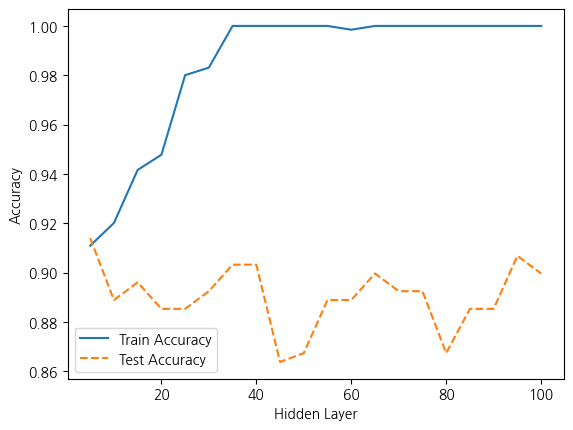

In [391]:
# 정확도 그래프 확인
plt.plot(para_hidden, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Hidden Layer")
plt.legend()

In [405]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# activation 변경 
para_function = ["logistic", "tanh", "relu"]

for v_function in para_function:
    nn = MLPClassifier(activation = v_function, hidden_layer_sizes=(40,40), random_state = 1234)
#     nn = MLPClassifier(activation = v_function, hidden_layer_sizes = (80,100,60), random_state = 1234) # 변경 가능
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_function = pd.DataFrame()
df_accuracy_function["ActivationFunction"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy

In [406]:
# Activation Function별 정확도 
df_accuracy_function.round(3)

,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.906,0.918
1,tanh,0.972,0.871
2,relu,1.000,0.903


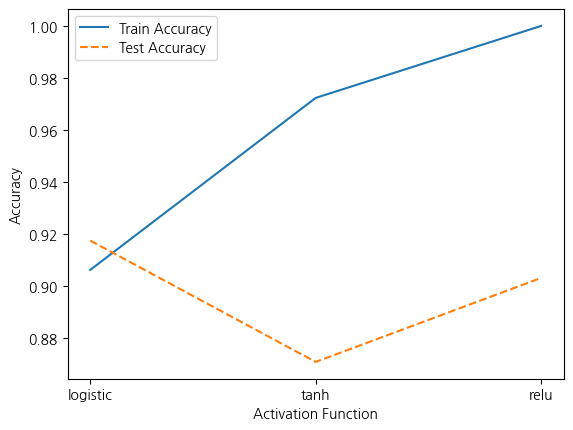

In [407]:
# 모델 정확도 그래프 확인
plt.plot(para_function, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_function, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Activation Function")
plt.legend()

In [408]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# solver 변경 
para_solver = ["lbfgs", "sgd", "adam"]

for v_solver in para_solver:
    nn = MLPClassifier(solver = v_solver, activation="logistic", hidden_layer_sizes=(60,60), random_state = 1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_solver = pd.DataFrame()
df_accuracy_solver["Solver"] = para_solver
df_accuracy_solver["TrainAccuracy"] = train_accuracy
df_accuracy_solver["TestAccuracy"] = test_accuracy

In [409]:
# Solver별 정확도 테이블
df_accuracy_solver.round(3)

,Solver,TrainAccuracy,TestAccuracy
0,lbfgs,1.000,0.839
1,sgd,0.791,0.842
2,adam,0.905,0.914


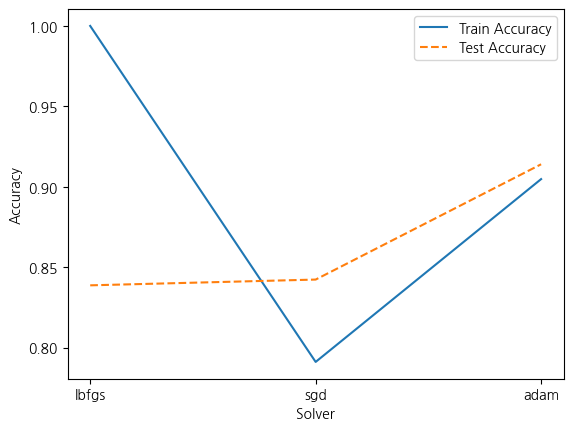

In [410]:
# 정확도 그래프 확인
plt.plot(para_solver, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_solver, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Solver")
plt.legend()

In [415]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# Mini Batch 변경
para_batch = [20 * batch for batch in range(1, 10)] 

print(para_batch)

for v_batch in para_batch:
    nn = MLPClassifier(batch_size = v_batch, solver = "adam", activation = "logistic", 
                       hidden_layer_sizes = (40,40), random_state = 1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))    

# 데이터 테이블로 저장
df_accuracy_batch = pd.DataFrame()
df_accuracy_batch["Mini Batch"] = para_batch
df_accuracy_batch["TrainAccuracy"] = train_accuracy
df_accuracy_batch["TestAccuracy"] = test_accuracy

[20, 40, 60, 80, 100, 120, 140, 160, 180]


In [416]:
# Mini Batch 별 정확도 
df_accuracy_batch.round(3)

,Mini Batch,TrainAccuracy,TestAccuracy
0,20,0.912,0.907
1,40,0.911,0.914
2,60,0.912,0.910
3,80,0.911,0.910
4,100,0.909,0.910
5,120,0.909,0.910
6,140,0.912,0.918
7,160,0.912,0.918
8,180,0.911,0.918


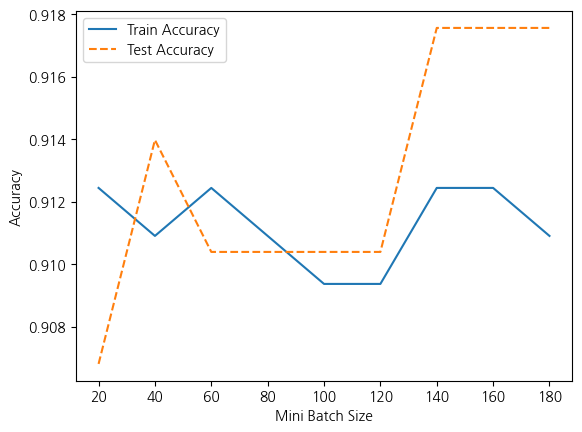

In [417]:
# 모델 정확도 그래프 확인
plt.plot(para_batch, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_batch, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Mini Batch Size")
plt.legend()

In [418]:
# train 및 test 정확도 결과 저장
train_accuracy = []; test_accuracy = []
# 학습률 변경
# para_lr = [0.01 * lr for lr in range(1, 10)] 
para_lr = [10 ** lr for lr in range(-3, 1)] 

print(para_lr)

for v_lr in para_lr:
    nn = MLPClassifier(learning_rate_init = v_lr, solver = "adam", activation = "logistic", 
                       hidden_layer_sizes = (40,40), random_state = 1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))    

# 데이터 테이블로 저장
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr["Learning Rate"] = para_lr
df_accuracy_lr["TrainAccuracy"] = train_accuracy
df_accuracy_lr["TestAccuracy"] = test_accuracy

[0.001, 0.01, 0.1, 1]


In [419]:
# 학습률별 정확도 
df_accuracy_lr.round(3)

,Learning Rate,TrainAccuracy,TestAccuracy
0,0.001,0.906,0.918
1,0.010,1.000,0.896
2,0.100,1.000,0.871
3,1.000,0.791,0.842


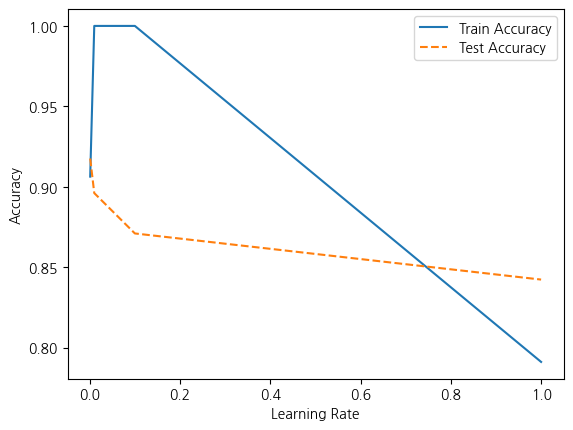

In [420]:
# 모델 정확도 그래프 확인
plt.plot(para_lr, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_lr, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Learning Rate")
plt.legend()

In [422]:
# 최종 모델
nn_final = MLPClassifier(hidden_layer_sizes=(40, 40), activation="logistic", solver="adam",random_state = 1234)
nn_final.fit(df_train_x, df_train_y)

# 평가
y_pred = nn_final.predict(df_test_x)

# train 모델 정확도
print("Train Accucary : {:.3f}".format(nn_final.score(df_train_x, df_train_y)))
# test 모델 정확도
print("Test Accuracy : {:.3f}\n".format(nn_final.score(df_test_x, df_test_y)))
# confusion matrix
print("Test Confusion Matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Train Accucary : 0.906
Test Accuracy : 0.918

Test Confusion Matrix: 
[[227   8]
 [ 15  29]]
              precision    recall  f1-score   support

           0      0.938     0.966     0.952       235
           1      0.784     0.659     0.716        44

    accuracy                          0.918       279
   macro avg      0.861     0.813     0.834       279
weighted avg      0.914     0.918     0.915       279



# 모델평가

In [454]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# 데이터 scaling
from sklearn.preprocessing import StandardScaler
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split

# 분류 Decision Tree
from sklearn.tree import DecisionTreeClassifier
# 분류 Random Forest
from sklearn.ensemble import RandomForestClassifier
# 분류 Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
# 분류 NN (MLPClassifier)
from sklearn.neural_network import MLPClassifier

# 모델 성능 평가: Precision, Recall, F1 Score, ROC Curve, AUC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report

# Check the Frequency of Variable
from collections import Counter

In [455]:
# 목표변수/설명변수 분리
df_raw_x = df_raw.drop("CHURN", axis = 1, inplace = False)
df_raw_y = df_raw["CHURN"] 

display("설명변수:", df_raw_x.head())
display("목표변수:",df_raw_y.head())

'설명변수:'

,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,1,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,1,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,1,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,0,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


'목표변수:'

0    0
1    0
2    0
3    0
4    0
Name: CHURN, dtype: int64

In [456]:
# 범주형 변수 선택 : select_dtypes="object" 
df_raw_x_char = df_raw_x.select_dtypes(include = "object")
df_raw_x_char.head()

# get_dummies: 범주형 변수에 대한 더미변환 
df_x_dummy = pd.get_dummies(df_raw_x_char)
df_x_dummy.head()

display("Dummy 변환 전:", df_raw_x_char.head())
display("Dummy 변환 후:",df_x_dummy.head())

'Dummy 변환 전:'

,CHARGE_TYPE,HANDSET,USAGE_BAND
0,CAT 100,ASAD170,Med
1,CAT 100,S50,Med
2,CAT 100,ASAD170,Med
3,CAT 100,ASAD170,Med
4,CAT 100,S50,Med


'Dummy 변환 후:'

,CHARGE_TYPE_CAT 100,CHARGE_TYPE_CAT 200,CHARGE_TYPE_CAT 50,CHARGE_TYPE_Play 100,CHARGE_TYPE_Play 300,HANDSET_ASAD170,HANDSET_ASAD90,HANDSET_BS110,HANDSET_BS210,HANDSET_CAS30,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [457]:
# 범주형 변수 선택 : select_dtypes="object" 
df_raw_x_char = df_raw_x.select_dtypes(include = "object")
df_raw_x_char.head()

# get_dummies: 범주형 변수에 대한 더미변환 
df_x_dummy = pd.get_dummies(df_raw_x_char)
df_x_dummy.head()

display("Dummy 변환 전:", df_raw_x_char.head())
display("Dummy 변환 후:",df_x_dummy.head())

'Dummy 변환 전:'

,CHARGE_TYPE,HANDSET,USAGE_BAND
0,CAT 100,ASAD170,Med
1,CAT 100,S50,Med
2,CAT 100,ASAD170,Med
3,CAT 100,ASAD170,Med
4,CAT 100,S50,Med


'Dummy 변환 후:'

,CHARGE_TYPE_CAT 100,CHARGE_TYPE_CAT 200,CHARGE_TYPE_CAT 50,CHARGE_TYPE_Play 100,CHARGE_TYPE_Play 300,HANDSET_ASAD170,HANDSET_ASAD90,HANDSET_BS110,HANDSET_BS210,HANDSET_CAS30,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [458]:
# 연속형 변수 선택 : select_dtypes="object" 제외
df_raw_x_num = df_raw_x.select_dtypes(exclude = "object")

# 변수명 저장
v_feature_names = df_raw_x_num.columns

# StandardScaler 적용
scaler = StandardScaler()
df_x_scaled = scaler.fit_transform(df_raw_x_num)
df_x_scaled = pd.DataFrame(df_x_scaled, columns=v_feature_names)

display("Scale 변환 전:", df_raw_x_num.head())
display("Scale 변환 후:",df_x_scaled.head())

'Scale 변환 전:'

,GENDER,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,31,33.33,6,218,379.8,9,21.6,366,632.4
1,1,27,30.87,10,373,656.4,11,28.0,411,810.4
2,1,27,49.40,11,260,582.0,0,0.0,265,614.1
3,1,61,48.60,1,294,661.8,14,101.5,326,844.0
4,0,52,56.03,0,221,555.6,7,25.0,274,673.0


'Scale 변환 후:'

,GENDER,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,-0.943527,-0.030604,-0.069958,0.949112,-0.032834,-0.617357,-0.432263,-0.755024,0.079015,-0.783880
1,1.059853,-0.335827,-0.243451,2.091732,0.651830,-0.080674,-0.307456,-0.579614,0.259163,-0.458260
2,1.059853,-0.335827,1.063386,2.377387,0.152687,-0.225031,-0.993897,-1.347031,-0.325316,-0.817357
3,1.059853,2.258568,1.006966,-0.479163,0.302872,-0.070196,-0.120245,1.434855,-0.081116,-0.396795
4,-0.943527,1.571816,1.530970,-0.764818,-0.019583,-0.276254,-0.557071,-0.661838,-0.289287,-0.709610


In [459]:
display("원래 설명변수:", df_raw_x.head(3))

# 원래 연속형(df_raw_x_num) + dummy된 범주형(df_x_dummy)
df_x_raw_dummy = df_raw_x_num.join(df_x_dummy)
display("원래 연속형+ Dummied 범주형...DT/RF/GB 용:",df_x_raw_dummy.head(3))

# scale된 연속형(df_x_scaled)+ dummy된 범주형(df_x_dummy)
df_x_scale_dummy = df_x_scaled.join(df_x_dummy)
display("Scaled 연속형+ Dummied 범주형...SVM/NN/KNN 용:",df_x_scale_dummy.head(3))

# scale된 연속형(df_x_scaled) + 원래 범주형(df_raw_x_char)
df_x_scale_raw = df_x_scaled.join(df_raw_x_char)
display("Scaled 연속형+ 원래 범주형...회귀분석용(표준화 회귀계수):",df_x_scale_raw.head(3))

'원래 설명변수:'

,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,1,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,1,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1


'원래 연속형+ Dummied 범주형...DT/RF/GB 용:'

,GENDER,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,0,31,33.33,6,218,379.8,9,21.6,366,632.4,...,0,0,0,0,0,0,1,0,0,0
1,1,27,30.87,10,373,656.4,11,28.0,411,810.4,...,0,0,0,0,0,0,1,0,0,0
2,1,27,49.40,11,260,582.0,0,0.0,265,614.1,...,0,0,0,0,0,0,1,0,0,0


'Scaled 연속형+ Dummied 범주형...SVM/NN/KNN 용:'

,GENDER,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,-0.943527,-0.030604,-0.069958,0.949112,-0.032834,-0.617357,-0.432263,-0.755024,0.079015,-0.783880,...,0,0,0,0,0,0,1,0,0,0
1,1.059853,-0.335827,-0.243451,2.091732,0.651830,-0.080674,-0.307456,-0.579614,0.259163,-0.458260,...,0,0,0,0,0,0,1,0,0,0
2,1.059853,-0.335827,1.063386,2.377387,0.152687,-0.225031,-0.993897,-1.347031,-0.325316,-0.817357,...,0,0,0,0,0,0,1,0,0,0


'Scaled 연속형+ 원래 범주형...회귀분석용(표준화 회귀계수):'

,GENDER,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,CHARGE_TYPE,HANDSET,USAGE_BAND
0,-0.943527,-0.030604,-0.069958,0.949112,-0.032834,-0.617357,-0.432263,-0.755024,0.079015,-0.783880,CAT 100,ASAD170,Med
1,1.059853,-0.335827,-0.243451,2.091732,0.651830,-0.080674,-0.307456,-0.579614,0.259163,-0.458260,CAT 100,S50,Med
2,1.059853,-0.335827,1.063386,2.377387,0.152687,-0.225031,-0.993897,-1.347031,-0.325316,-0.817357,CAT 100,ASAD170,Med


In [460]:
# 원래 연속형+ Dummied 범주형...DT/RF/GB 용:df_x_raw_dummy
df_train_x_rd, df_test_x_rd, df_train_y, df_test_y = train_test_split(df_x_raw_dummy, df_raw_y
                                    , test_size = 0.3, random_state = 1234)

display("원래 연속형+ Dummied 범주형...DT/RF/GB 용:", df_train_x_rd.head())

# 기계학습용 데이터(Scaled 연속형+ Dummied 범주형) 분할:df_x_scale_dummy 
df_train_x_sd, df_test_x_sd, df_train_y, df_test_y = train_test_split(df_x_scale_dummy, df_raw_y
                                    , test_size = 0.3, random_state = 1234)

display("Scaled 연속형+ Dummied 범주형...SVM/NN/KNN 용:", df_train_x_sd.head())

# 회귀분석용(표준화 회귀계수) 데이터(Scaled 연속형+ 원래 범주형) 분할:df_x_scale_raw 
df_train_x_reg, df_test_x_reg, df_train_y, df_test_y = train_test_split(df_x_scale_raw, df_raw_y
                                    , test_size = 0.3, random_state = 1234)

display("Scaled 연속형+ 원래 범주형...회귀분석용(표준화 회귀계수):",df_train_x_reg.head())

'원래 연속형+ Dummied 범주형...DT/RF/GB 용:'

,GENDER,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
64,0,40,36.00,2,556,1436.4,8,74.0,736,1862.9,...,0,0,0,0,0,0,0,1,0,0
201,0,41,45.33,11,73,403.2,15,39.0,204,962.4,...,0,0,0,0,0,0,1,0,0,0
37,0,26,55.07,0,546,1228.2,0,0.0,588,1294.8,...,0,0,0,0,0,0,0,1,0,0
403,0,24,50.83,2,249,445.2,6,15.0,274,527.1,...,0,0,0,1,0,0,1,0,0,0
322,1,32,55.63,10,125,232.2,4,112.8,159,525.9,...,0,0,0,0,0,0,1,0,0,0


'Scaled 연속형+ Dummied 범주형...SVM/NN/KNN 용:'

,GENDER,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
64,-0.943527,0.656147,0.118345,-0.193508,1.460175,1.432749,-0.494667,0.681142,1.560230,1.467105,...,0,0,0,0,0,0,0,1,0,0
201,-0.943527,0.732453,0.776348,2.377387,-0.673327,-0.571954,-0.057841,-0.278129,-0.569516,-0.180203,...,0,0,0,0,0,0,1,0,0,0
37,-0.943527,-0.412133,1.463266,-0.764818,1.416003,1.028781,-0.993897,-1.347031,0.967744,0.427865,...,0,0,0,0,0,0,0,1,0,0
403,-0.943527,-0.564745,1.164238,-0.193508,0.104098,-0.490462,-0.619475,-0.935915,-0.289287,-0.976508,...,0,0,0,1,0,0,1,0,0,0
322,1.059853,0.045701,1.502760,2.091732,-0.443633,-0.903743,-0.744282,1.744562,-0.749664,-0.978704,...,0,0,0,0,0,0,1,0,0,0


'Scaled 연속형+ 원래 범주형...회귀분석용(표준화 회귀계수):'

,GENDER,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,CHARGE_TYPE,HANDSET,USAGE_BAND
64,-0.943527,0.656147,0.118345,-0.193508,1.460175,1.432749,-0.494667,0.681142,1.560230,1.467105,CAT 200,S50,MedHigh
201,-0.943527,0.732453,0.776348,2.377387,-0.673327,-0.571954,-0.057841,-0.278129,-0.569516,-0.180203,Play 300,ASAD170,Med
37,-0.943527,-0.412133,1.463266,-0.764818,1.416003,1.028781,-0.993897,-1.347031,0.967744,0.427865,CAT 200,S50,MedHigh
403,-0.943527,-0.564745,1.164238,-0.193508,0.104098,-0.490462,-0.619475,-0.935915,-0.289287,-0.976508,CAT 100,WC95,Med
322,1.059853,0.045701,1.502760,2.091732,-0.443633,-0.903743,-0.744282,1.744562,-0.749664,-0.978704,Play 100,BS210,Med


In [461]:
# 분석 모델 리스트
model = ["DecisionTree", "RandomForest", "GradientBoosting", "NeuralNet"]

# 정확도 저장
train_accuracy = []; test_accuracy = []
# auc score 저장
model_auc = []

# Precision, Recall score 저장
model_precision = []; model_recall = []
# f1 score 저장
model_f1_score = []

In [462]:
model

['DecisionTree', 'RandomForest', 'GradientBoosting', 'NeuralNet']

In [463]:
# 최종모델
dt_final = DecisionTreeClassifier(max_depth=7, min_samples_split=50, min_samples_leaf=14, random_state=1234)
dt_final.fit(df_train_x_rd, df_train_y)

# 정확도
train_accuracy.append(dt_final.score(df_train_x_rd, df_train_y))
test_accuracy.append(dt_final.score(df_test_x_rd, df_test_y))

# 예측값
y_prob_1 = dt_final.predict_proba(df_test_x_rd)[:, 1]  # 1 발생 확률
y_pred = dt_final.predict(df_test_x_rd)  # 1/0 판정

print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

# fpr(=1-특이도) = FP/(FP+TN): 거짓 양성 비율, tpr(=민감도) = TP/(TP+FN): 진짜 양성 비율(재현율)
fpr, tpr, thresholds = roc_curve(df_test_y, y_prob_1)
roc_auc = auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

Confusion matrix: 
[[228   7]
 [ 17  27]]
              precision    recall  f1-score   support

           0      0.931     0.970     0.950       235
           1      0.794     0.614     0.692        44

    accuracy                          0.914       279
   macro avg      0.862     0.792     0.821       279
weighted avg      0.909     0.914     0.909       279



In [464]:
print("P(y=1) 확률...", y_prob_1)
print()
print("1/0-판정...",y_pred)

P(y=1) 확률... [0.03266332 0.03266332 0.03266332 0.19047619 0.47826087 0.90909091
 0.5        0.47826087 0.03266332 0.03266332 0.19047619 0.5
 0.03266332 0.03266332 0.19047619 0.86046512 0.03266332 0.03448276
 0.03266332 0.03266332 0.47826087 0.03266332 0.03266332 0.03266332
 0.5        0.17391304 0.03266332 0.17391304 0.03266332 0.03266332
 0.75       0.19047619 0.03266332 0.03266332 0.03266332 0.03448276
 0.03266332 0.03266332 0.03266332 0.03266332 0.03266332 0.47826087
 0.03266332 0.86046512 0.17391304 0.47826087 0.03266332 0.03266332
 0.90909091 0.03266332 0.03266332 0.03266332 0.03266332 0.19047619
 0.03266332 0.03266332 0.03448276 0.90909091 0.03266332 0.03266332
 0.23809524 0.86046512 0.5        0.03266332 0.03266332 0.03266332
 0.03266332 0.03266332 0.03266332 0.90909091 0.5        0.03266332
 0.03266332 0.03448276 0.03266332 0.03266332 0.03266332 0.03266332
 0.03266332 0.03266332 0.90909091 0.03266332 0.75       0.03266332
 0.17391304 0.03266332 0.75       0.03266332 0.86046512 

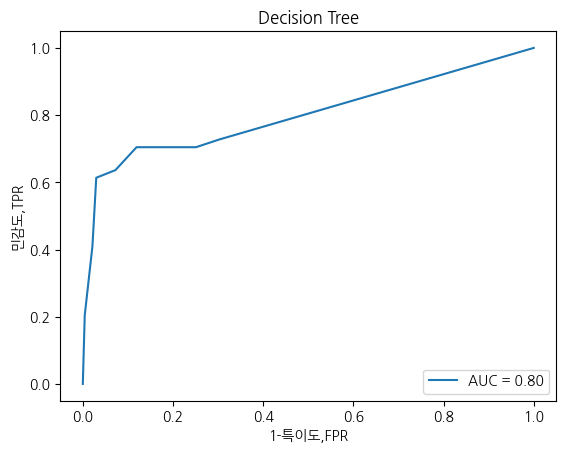

In [465]:
plt.title("Decision Tree")
plt.plot(fpr, tpr, label= "AUC = %0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("민감도,TPR"); plt.xlabel("1-특이도,FPR") 
plt.show()

In [466]:
# precision, recall score
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

# f1 score
model_f1_score.append(f1_score(df_test_y, y_pred))
model_f1_score

[0.6923076923076923]

In [467]:
# 최종 모델
rf_final = RandomForestClassifier(min_samples_leaf=8, max_depth=6, n_estimators=120, random_state=1234)
rf_final.fit(df_train_x_rd, df_train_y)

# 정확도
train_accuracy.append(rf_final.score(df_train_x_rd, df_train_y))
test_accuracy.append(rf_final.score(df_test_x_rd, df_test_y))

# 예측값
y_prob_1 = rf_final.predict_proba(df_test_x_rd)[:, 1]  # 1 발생 확률
y_pred = rf_final.predict(df_test_x_rd)  # 1/0 판정

print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

# fpr(=1-특이도) = FP/(FP+TN): 거짓 양성 비율, tpr(=민감도) = TP/(TP+FN): 진짜 양성 비율(재현율)
fpr, tpr, thresholds = roc_curve(df_test_y, y_prob_1)
roc_auc = auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

Confusion matrix: 
[[229   6]
 [ 23  21]]
              precision    recall  f1-score   support

           0      0.909     0.974     0.940       235
           1      0.778     0.477     0.592        44

    accuracy                          0.896       279
   macro avg      0.843     0.726     0.766       279
weighted avg      0.888     0.896     0.885       279



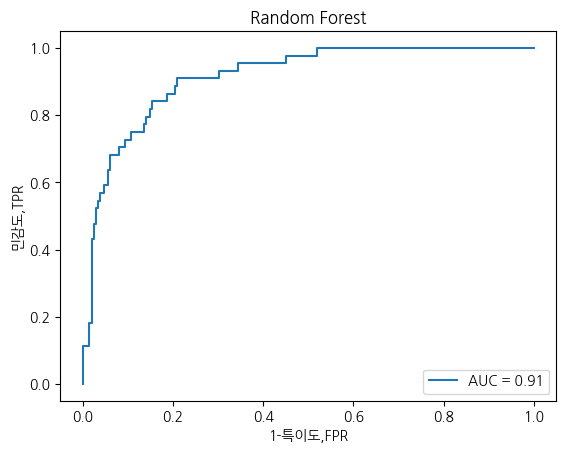

In [468]:
plt.title("Random Forest")
plt.plot(fpr, tpr, label= "AUC = %0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("민감도,TPR"); plt.xlabel("1-특이도,FPR") 
plt.show()

In [469]:
# precision, recall score
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

# f1 score
model_f1_score.append(f1_score(df_test_y, y_pred))
model_f1_score

[0.6923076923076923, 0.5915492957746479]

In [470]:
# 최종 모델
gb_final = GradientBoostingClassifier(min_samples_leaf=20, max_depth=8, n_estimators=25, 
                                      learning_rate=0.6, random_state=1234)
gb_final.fit(df_train_x_rd, df_train_y)

# 정확도
train_accuracy.append(gb_final.score(df_train_x_rd, df_train_y))
test_accuracy.append(gb_final.score(df_test_x_rd, df_test_y))

# 예측값
y_prob_1 = gb_final.predict_proba(df_test_x_rd)[:, 1]  # 1 발생 확률
y_pred = gb_final.predict(df_test_x_rd)  # 1/0 판정

print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)),"\n")
print(classification_report(df_test_y, y_pred, digits=3))

# fpr(=1-특이도) = FP/(FP+TN): 거짓 양성 비율, tpr(=민감도) = TP/(TP+FN): 진짜 양성 비율(재현율)
fpr, tpr, thresholds = roc_curve(df_test_y, y_prob_1)
roc_auc = auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

Confusion matrix: 
[[218  17]
 [ 15  29]] 

              precision    recall  f1-score   support

           0      0.936     0.928     0.932       235
           1      0.630     0.659     0.644        44

    accuracy                          0.885       279
   macro avg      0.783     0.793     0.788       279
weighted avg      0.887     0.885     0.886       279



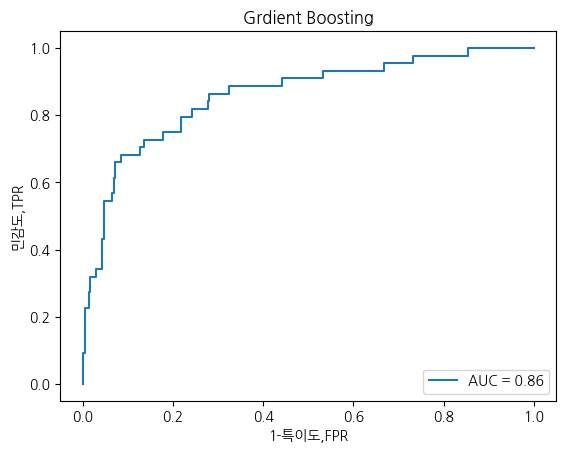

In [471]:
plt.title("Grdient Boosting")
plt.plot(fpr, tpr, label= "AUC = %0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("민감도,TPR"); plt.xlabel("1-특이도,FPR") 
plt.show()

In [472]:
# precision, recall score
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

# f1 score
model_f1_score.append(f1_score(df_test_y, y_pred))
model_f1_score

[0.6923076923076923, 0.5915492957746479, 0.6444444444444444]

In [473]:
# 최종 모델
nn_final = MLPClassifier(hidden_layer_sizes=(40, 40), activation="logistic", solver="adam", random_state = 1234)
nn_final.fit(df_train_x_sd, df_train_y)

# 정확도
train_accuracy.append(nn_final.score(df_train_x_sd, df_train_y))
test_accuracy.append(nn_final.score(df_test_x_sd, df_test_y))

# 예측값
y_prob_1 = nn_final.predict_proba(df_test_x_sd)[:, 1]  # 1 발생 확률
y_pred = nn_final.predict(df_test_x_sd)  # 1/0 판정

print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)),"\n")
print(classification_report(df_test_y, y_pred, digits=3))

# fpr(=1-특이도) = FP/(FP+TN): 거짓 양성 비율, tpr(=민감도) = TP/(TP+FN): 진짜 양성 비율(재현율)
fpr, tpr, thresholds = roc_curve(df_test_y, y_prob_1)
roc_auc = auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

Confusion matrix: 
[[227   8]
 [ 15  29]] 

              precision    recall  f1-score   support

           0      0.938     0.966     0.952       235
           1      0.784     0.659     0.716        44

    accuracy                          0.918       279
   macro avg      0.861     0.813     0.834       279
weighted avg      0.914     0.918     0.915       279



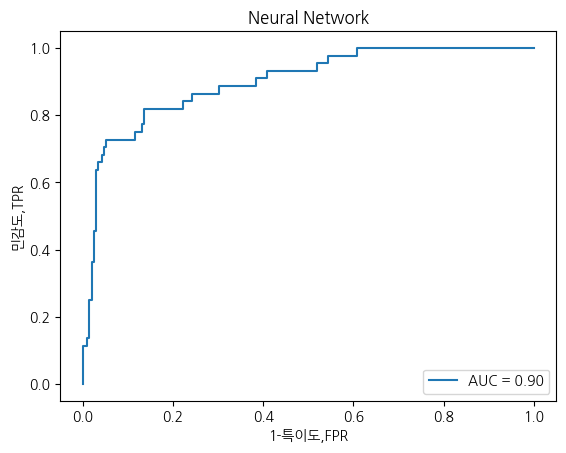

In [474]:
plt.title("Neural Network")
plt.plot(fpr, tpr, label= "AUC = %0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("민감도,TPR"); plt.xlabel("1-특이도,FPR") 
plt.show()

In [475]:
# precision, recall score
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

# f1 score
model_f1_score.append(f1_score(df_test_y, y_pred))
model_f1_score

[0.6923076923076923,
 0.5915492957746479,
 0.6444444444444444,
 0.7160493827160493]

In [476]:
# 모델별 평가 결과
df_eval = pd.DataFrame(index = model)
df_eval["TrainAccuracy"] = train_accuracy ; df_eval["TestAccuracy"] = test_accuracy
df_eval["AUC"] = model_auc

df_eval["Precision"] = model_precision; df_eval["Recall"] = model_recall
df_eval["F1Score"] = model_f1_score

df_eval.round(3)

,TrainAccuracy,TestAccuracy,AUC,Precision,Recall,F1Score
DecisionTree,0.885,0.914,0.800,0.794,0.614,0.692
RandomForest,0.894,0.896,0.913,0.778,0.477,0.592
GradientBoosting,1.000,0.885,0.860,0.630,0.659,0.644
NeuralNet,0.906,0.918,0.899,0.784,0.659,0.716


In [477]:
df_eval.T

,DecisionTree,RandomForest,GradientBoosting,NeuralNet
TrainAccuracy,0.884793,0.894009,1.000000,0.906298
TestAccuracy,0.913978,0.896057,0.885305,0.917563
AUC,0.800193,0.913443,0.859574,0.899033
Precision,0.794118,0.777778,0.630435,0.783784
Recall,0.613636,0.477273,0.659091,0.659091
F1Score,0.692308,0.591549,0.644444,0.716049


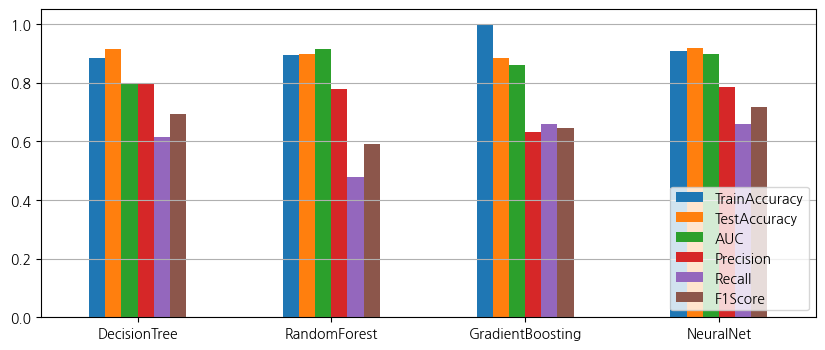

In [478]:
# 모델별 평가 지표 확인
df_eval.plot.bar(rot = 0, figsize=(10,4))
plt.legend(loc="lower right"); plt.grid(axis = "y")

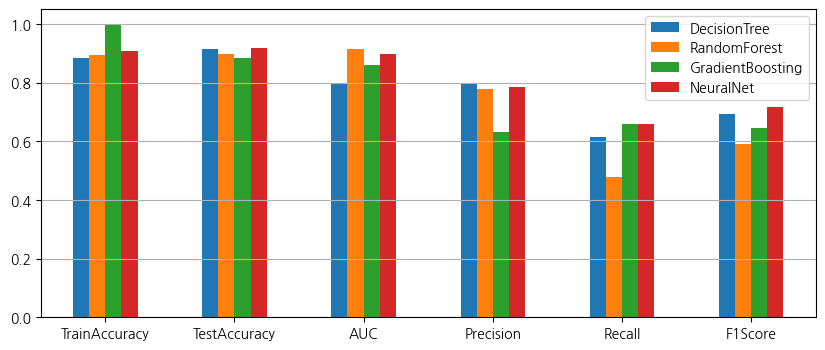

In [479]:
# Data 전치하여 지표 기준으로 모델 성능 평가 
df_eval.T.plot.bar(rot = 0, figsize=(10,4))
plt.legend(loc="upper right"); plt.grid(axis = "y")